In [1]:
#I am using my Python 3 11 scanorama env
! python --version

Python 3.11.9


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib.collections import PatchCollection
import matplotlib.patches as patches
import seaborn as sns

from pathlib import Path

import scanpy as sc

import anndata as an
import scanorama

import re

import math

import squidpy as sq

import scipy.sparse
from scipy.stats import zscore
from scipy.ndimage import zoom, gaussian_filter

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from shapely.geometry import Polygon, MultiPolygon, Point

from adjustText import adjust_text

import warnings

import geopandas as gpd

from scipy.stats import zscore
from scipy.signal import savgol_filter  

from scipy.cluster.hierarchy import linkage, leaves_list

In [3]:
sc.logging.print_versions()

-----
anndata     0.10.7
scanpy      1.10.0
-----
PIL                         10.3.0
adjustText                  1.3.0
annoy                       NA
anyio                       NA
asciitree                   NA
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.11.0
brotli                      1.0.9
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          2.0.4
cloudpickle                 3.0.0
colorama                    0.4.6
comm                        0.2.1
cycler                      0.12.1
cython_runtime              NA
dask                        2024.5.0
dask_expr                   1.1.0
dask_image                  2023.08.1
datashader                  0.16.1
datatree                    0.0.14
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
docrep                     

In [4]:
warnings.simplefilter("ignore")


VGN1e1 = late double ridge, VRT-A2a (P1 WT) <p>
VGN1e9 = late double ridge, VRT-A2b (P1 Pol) <p>
VGN1b6 = lemma primorida, VRT-A2a (P1 WT) <p>
VGN1b8 = lemma primorida, VRT-A2b (P1 Pol) <p>
VGN1a6 = terminal spikelet, VRT-A2a (P1 WT) <p>
VGN1a4 = terminal spikelet, VRT-A2b (P1 Pol) <p>
VGN1c2 = carpel extension round, VRT-A2a (P1 WT) <p>
VGN1c3 = carpel extension round, VRT-A2b (P1 Pol)


In [7]:
# Extract cell identifiers and cluster assignments for later uses 
cell_cluster_assignments = adata_spatial.obs[['clusters']]

# Optionally reset the index to get the cell IDs as a column
cell_cluster_assignments.reset_index(inplace=True)

# Rename columns for clarity
cell_cluster_assignments.columns = ['cell_id', 'cluster']

# Save to a DataFrame
df_cell_cluster_assignments = pd.DataFrame(cell_cluster_assignments)

# Ensure that 'cell_id' is treated as a string column
df_cell_cluster_assignments['cell_id'] = df_cell_cluster_assignments['cell_id'].astype(str)

# Split the 'cell_id' column by '-' and expand into two columns
split_columns = df_cell_cluster_assignments['cell_id'].str.split('-', expand=True)

# Assign the first part to 'cell_id' and the second part to 'sample'
df_cell_cluster_assignments['cell_id'] = split_columns[0]
df_cell_cluster_assignments['sample'] = split_columns[1]

df_cell_cluster_assignments.set_index('cell_id', inplace=True)

## Analysing Domain and Cell Number in WT LDR + LP spikes 

Starting with late double ridge WT spike 

In [7]:
#extracting the cells in the inflorescence only, group created in MERSCOPE Visualiser tool 
cellsinspike = pd.read_csv('latedoubleridge_expressionanalysis/VGN1e1_allcellsinspike.csv')
cellsinspike.rename(columns={cellsinspike.columns[0]: 'cell_id'}, inplace=True)
cellsinspike['cell_id'] = cellsinspike['cell_id'].astype(str)
cellsinspike_VGN1e1 = cellsinspike.copy()

In [9]:
#filter my dataframe so that only cells in the spike are included
cell_id_list = cellsinspike_VGN1e1['cell_id'].tolist()
# Filter combined_df to only include rows where the index is in the cell_id_list
cluster_VGN1e1 = df_cell_cluster_assignments[df_cell_cluster_assignments.index.isin(cell_id_list)]
unique_clusters_count = cluster_VGN1e1['cluster'].nunique()
print("Number of unique clusters in LDR inflorescence:", unique_clusters_count)

Number of unique clusters in LDR inflorescence: 10


In [10]:
# Calculate the total cell count per cluster, excluding clusters with 0 cells
cluster_counts = cluster_VGN1e1['cluster'].value_counts()
cluster_counts = cluster_counts[cluster_counts > 0]  # Filter out clusters with 0 cells

# Calculate cumulative percentages
cumulative_percentage = cluster_counts.cumsum() / cluster_counts.sum()

# Print cumulative percentages for the top N domains
for i in range(1, len(cumulative_percentage) + 1):
    percentage = cumulative_percentage.iloc[i - 1] * 100
    print(f"The top {i} domains account for {percentage:.2f}% of cells.")


The top 1 domains account for 34.90% of cells.
The top 2 domains account for 65.77% of cells.
The top 3 domains account for 81.06% of cells.
The top 4 domains account for 94.81% of cells.
The top 5 domains account for 98.17% of cells.
The top 6 domains account for 98.75% of cells.
The top 7 domains account for 99.23% of cells.
The top 8 domains account for 99.71% of cells.
The top 9 domains account for 99.90% of cells.
The top 10 domains account for 100.00% of cells.


Moving onto lemma primordia WT spike 

In [14]:
#filter my dataframe so that only cells in the spike are included
cellsinspike = pd.read_csv('latedoubleridge_expressionanalysis/VGN1b6_allcellsinspike.csv')
cellsinspike.rename(columns={cellsinspike.columns[0]: 'cell_id'}, inplace=True)
cellsinspike['cell_id'] = cellsinspike['cell_id'].astype(str)
cellsinspike_VGN1b6 = cellsinspike.copy()

#filter my dataframe so that only cells in the spike are included
cell_id_list = cellsinspike_VGN1b6['cell_id'].tolist()
# Filter combined_df to only include rows where the index is in the cell_id_list
cluster_VGN1b6 = df_cell_cluster_assignments[df_cell_cluster_assignments.index.isin(cell_id_list)]
unique_clusters_count = cluster_VGN1b6['cluster'].nunique()
print("Number of unique clusters in LP inflorescence :", unique_clusters_count)

Number of unique clusters in LP inflorescence : 14


In [15]:
# Calculate the total cell count per cluster, excluding clusters with 0 cells
cluster_counts = cluster_VGN1b6['cluster'].value_counts()
cluster_counts = cluster_counts[cluster_counts > 0]  # Filter out clusters with 0 cells

# Calculate cumulative percentages
cumulative_percentage = cluster_counts.cumsum() / cluster_counts.sum()

# Print cumulative percentages for the top N domains
for i in range(1, len(cumulative_percentage) + 1):
    percentage = cumulative_percentage.iloc[i - 1] * 100
    print(f"The top {i} domains account for {percentage:.2f}% of cells.")


The top 1 domains account for 31.13% of cells.
The top 2 domains account for 54.58% of cells.
The top 3 domains account for 67.66% of cells.
The top 4 domains account for 76.46% of cells.
The top 5 domains account for 82.52% of cells.
The top 6 domains account for 87.40% of cells.
The top 7 domains account for 90.96% of cells.
The top 8 domains account for 94.07% of cells.
The top 9 domains account for 96.45% of cells.
The top 10 domains account for 98.79% of cells.
The top 11 domains account for 99.27% of cells.
The top 12 domains account for 99.64% of cells.
The top 13 domains account for 99.88% of cells.
The top 14 domains account for 100.00% of cells.


### how many cells at leaf ridge base of LDR sample VGN1e1 compared to leaf ridge apex? 

In [14]:
# I am reading in cell groups. I selected Leaf ridges (LRs) and spikelet ridges (SRs) and numbered them 1-13
#I performed the groupings in MERSCOPE Visualiser tool and exported to a .csv file 
cellgroups = pd.read_csv('latedoubleridge_expressionanalysis/VGN1e_region1_cell_categoriesv3.csv', header=0, index_col=0)
cellgroups = cellgroups[['Custom cell groups']].copy()

In [21]:

# Count occurrences of each 'LR' group in the 'Custom cell groups' column
lr1_count = cellgroups['Custom cell groups'].value_counts().get('LR1', 0)
print("Number of entries under 'LR1':", lr1_count)

lr2_count = cellgroups['Custom cell groups'].value_counts().get('LR2', 0)
print("Number of entries under 'LR2':", lr2_count)

lr3_count = cellgroups['Custom cell groups'].value_counts().get('LR3', 0)
print("Number of entries under 'LR3':", lr3_count)

lr4_count = cellgroups['Custom cell groups'].value_counts().get('LR4', 0)
print("Number of entries under 'LR4':", lr4_count)

# Store the counts in a list
lr_counts = [lr1_count, lr2_count, lr3_count, lr4_count]

# Calculate the average
average_count = sum(lr_counts) / len(lr_counts)

# Calculate the standard deviation
variance = sum((x - average_count) ** 2 for x in lr_counts) / len(lr_counts)
std_dev = math.sqrt(variance)

# Format the result
print(f"Averaging {average_count:.2f} ± {std_dev:.2f} cells per section.")

Number of entries under 'LR1': 58
Number of entries under 'LR2': 32
Number of entries under 'LR3': 16
Number of entries under 'LR4': 24
Averaging 32.50 ± 15.77 cells per section.


In [23]:
# Count occurrences of each 'LR' group in the 'Custom cell groups' column
lr8_count = cellgroups['Custom cell groups'].value_counts().get('LR8', 0)
print("Number of entries under 'LR8':", lr8_count)

lr9_count = cellgroups['Custom cell groups'].value_counts().get('LR9', 0)
print("Number of entries under 'LR9':", lr9_count)

lr10_count = cellgroups['Custom cell groups'].value_counts().get('LR10', 0)
print("Number of entries under 'LR10':", lr10_count)

lr11_count = cellgroups['Custom cell groups'].value_counts().get('LR11', 0)
print("Number of entries under 'LR11':", lr11_count)

# Store the counts in a list
lr_counts = [lr8_count, lr9_count, lr10_count, lr11_count]

# Calculate the average
average_count = sum(lr_counts) / len(lr_counts)

# Calculate the standard deviation
variance = sum((x - average_count) ** 2 for x in lr_counts) / len(lr_counts)
std_dev = math.sqrt(variance)

# Format the result
print(f"Averaging {average_count:.2f} ± {std_dev:.2f} cells per section.")


Number of entries under 'LR8': 15
Number of entries under 'LR9': 12
Number of entries under 'LR10': 12
Number of entries under 'LR11': 11
Averaging 12.50 ± 1.50 cells per section.


### Performing PCA analysis on SRs and LRs 

In [68]:
# reading in gene name annotations for later 
file_path = 'annotated_names_12_24.csv'
annotation = pd.read_csv(file_path, header = 0, index_col=0)

First I will extract normalised expression values, and average them within each leaf ridge or spikelet ridge group 
</p> (Supplementary File 14)

In [69]:
#Read in the cleaned/filtered adata objects for my samples
# Define the filenames of the saved AnnData objects
adata_filenames = {
    "adata_VGN1e1": "qc/adata_VGN1e1_clean.h5ad"
}

# Initialize a dictionary to store the loaded AnnData objects
loaded_adata_objects = {}

# Load each file and store it in the dictionary
for name, filename in adata_filenames.items():
    loaded_adata_objects[name] = sc.read_h5ad(filename)
    print(f"Loaded {name} from {filename}")

# Access the loaded AnnData objects
adata_VGN1e1 = loaded_adata_objects["adata_VGN1e1"]

Loaded adata_VGN1e1 from qc/adata_VGN1e1_clean.h5ad


In [70]:
# take the normalised expression score adata_VGN1e1
if isinstance(adata_VGN1e1.X, scipy.sparse.spmatrix):
    X_dense = adata_VGN1e1.X.toarray()
else:
    X_dense = adata_VGN1e1.X

    # Create gene expression matrix dataframe
cell_names = adata_VGN1e1.obs_names
gene_names = adata_VGN1e1.var_names
gene_expression_matrix = pd.DataFrame(data=X_dense, index=cell_names, columns=gene_names)

#merge the cell groups and the gene expression matrix 
#Step 1: make sure the index are both strings
gene_expression_matrix.index = gene_expression_matrix.index.astype(str)
cellgroups.index = cellgroups.index.astype(str)

# Step 2: Filter gene_expression_matrix to only include rows present in cellgroups
filtered_gene_expression = gene_expression_matrix[gene_expression_matrix.index.isin(cellgroups.index)]

# Step 3: Combine the two dataframes (matching by index)
combined_df = filtered_gene_expression.join(cellgroups, how='inner')

#Take the average expression score, grouped by the cell groups (LRs and SRs) 
average_gene_expression_per_group = combined_df.groupby('Custom cell groups').mean()

#Filter the gene columns so that genes must have at least one expressions score above 0.30 
filtered_average_gene_expression_per_group = average_gene_expression_per_group.loc[:, (average_gene_expression_per_group > 0.30).any()] #

#saving as supplementary table JK
filtered_average_gene_expression_per_group.to_csv("latedoubleridge_expressionanalysis/Averaged_NormalisedCountsperCell_SRLRgroups.csv", index=False)

filtered_average_gene_expression_per_group

TraesCS1A02G306300  TraesCS6A02G110100  \
Custom cell groups                                           
LR1                           0.592195            0.312819   
LR10                          0.166783            0.116201   
LR11                          0.684832            0.273548   
LR12                          0.600684            0.128895   
LR13                          0.360574            0.389003   
LR2                           0.586304            0.261049   
LR3                           0.465635            0.170759   
LR4                           0.636107            0.206557   
LR5                           0.467356            0.537221   
LR6                           0.425357            0.468046   
LR7                           0.672517            0.359510   
LR8                           0.420459            0.213227   
LR9                           0.225574            0.224766   
SR1                           0.541430            0.336418   
SR10                          0.504564            0.300212   
SR11                          0.511758            0.232318   
SR12                          0.606333            0.299601   
SR13                          0.578468            0.426859   
SR2                           0.709433            0.459145   
SR3                           0.597196            0.291229   
SR4                           0.674868            0.591478   
SR5                           0.644822            0.291122   
SR6                           0.620145            0.400137   
SR7                           0.554810            0.381108   
SR8                           0.524945            0.268547   
SR9                           0.590473            0.325358   

                    TraesCS4D02G017800  TraesCS5A02G401800  \
Custom cell groups                                           
LR1                           0.279014            0.068456   
LR10                          0.078862            0.906650   
LR11                          0.195358            0.593503   
LR12                          0.000000            0.710492   
LR13                          0.512968            0.841780   
LR2                           0.203035            0.036374   
LR3                           0.419600            0.044473   
LR4                           0.304616            0.312261   
LR5                           0.268395            0.299504   
LR6                           0.295317            0.738063   
LR7                           0.345488            0.647262   
LR8                           0.346802            0.889216   
LR9                           0.111285            0.953991   
SR1                           0.197737            0.046988   
SR10                          0.233929            0.568850   
SR11                          0.136268            0.551260   
SR12                          0.228888            0.271189   
SR13                          0.405973            0.230471   
SR2                           0.360103            0.212265   
SR3                           0.469252            0.141653   
SR4                           0.410552            0.120234   
SR5                           0.281604            0.238422   
SR6                           0.178400            0.278680   
SR7                           0.273648            0.211025   
SR8                           0.189305            0.389974   
SR9                           0.200954            0.686311   

                    TraesCS6A02G335900  TraesCS5B02G246700  \
Custom cell groups                                           
LR1                           1.158507            0.453646   
LR10                          1.153218            0.344580   
LR11                          1.585243            0.406452   
LR12                          1.236984            0.299100   
LR13                          1.077243            0.437985   
LR2                           1.514485            0.472151   
LR3                           1.276095            

### creating PCA plot for leaf ridges only 

In [77]:
plt.style.use('default')

# exclude spiklet ridge groups 'SR' from the dataframe
filtered_data = filtered_average_gene_expression_per_group[~(
    filtered_average_gene_expression_per_group.index.str.startswith('SR'))]

# Step 1: Standardize the filtered data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Step 2: Perform PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 3: Retrieve explained variance for PC1 and PC2
explained_variance = pca.explained_variance_ratio_

# Step 4: Convert PCA result to a dataframe for easier plotting

# Invert PC1 and PC2 values
pca_result[:, 0] *= -1  # Invert PC1
pca_result[:, 1] *= -1  # Invert PC2

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=filtered_data.index)

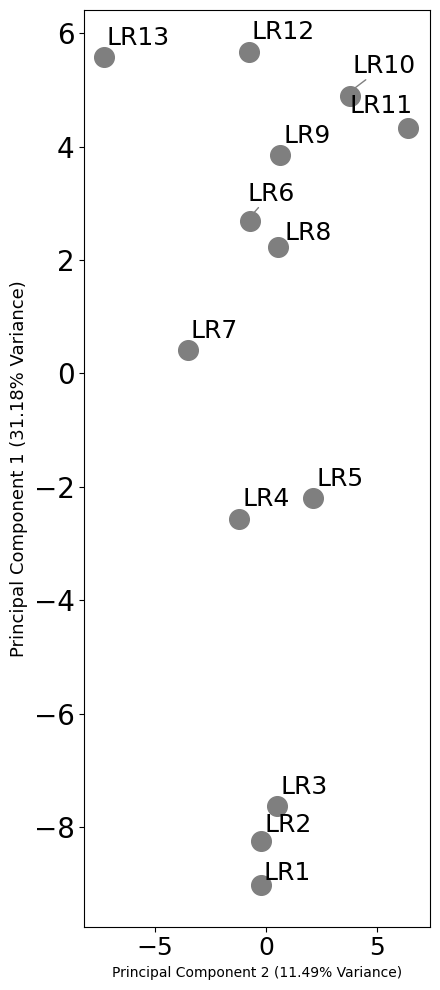

In [78]:
# Step 5: Plot the PCA results and add explained variance to axis labels
plt.figure(figsize=(4.5, 10))

# Scatter plot with custom color for 'SR' categories
texts = []  # For storing text objects for adjustText
for i, cell_group in enumerate(pca_df.index):
    plt.scatter(pca_df.iloc[i, 1], pca_df.iloc[i, 0], color='#7F7F7F', s=200)
    # Adjust the offset for text labels
    texts.append(plt.text(pca_df.iloc[i, 1] + 0.10, pca_df.iloc[i, 0] + 0.10, cell_group, fontsize=18)) 

# Adjust text positions to avoid overlap
adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray'))

plt.ylabel(f'Principal Component 1 ({explained_variance[0] * 100:.2f}% Variance)', fontsize=13)
plt.xlabel(f'Principal Component 2 ({explained_variance[1] * 100:.2f}% Variance)', fontsize=10)

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=20)

# Extend the x-axis slightly
x_min, x_max = plt.xlim()
plt.xlim(x_min - 0.2, x_max + 0.3)

# Add grid lines (optional)
plt.grid(False)


# Show the plot
plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_LRPCA.svg', dpi=700, bbox_inches='tight', format='svg', transparent=True)
plt.show()

In [79]:
# Calculate the correlation of all genes with PC1
correlations = filtered_data.corrwith(pca_df['PC1'])

#saving correlation scores to make a supplementary table combined with SR scores 
correlations_LR = pd.DataFrame(correlations.copy())
correlations_LR = correlations.reset_index()
correlations_LR.columns = ['geneid', 'Corr_PC1_LRs']

# Sort by absolute value to get the strongest correlations (both positive and negative)
top_correlations_LRs = correlations.abs().sort_values(ascending=False).head(25)

# Convert this to a dataframe for easier visualization
top_correlations_LRs_df = pd.DataFrame({'Gene': top_correlations_LRs.index, 'Correlation': correlations[top_correlations_LRs.index]})

# Merge with annotation
top_correlations_LRs_df = pd.merge(top_correlations_LRs_df, annotation, left_on='Gene', right_index=True, how='inner')

top_correlations_LRs_df

Gene  Correlation  \
TraesCS5A02G230500  TraesCS5A02G230500     0.950820   
TraesCS1D02G162600  TraesCS1D02G162600     0.944911   
TraesCS6A02G287300  TraesCS6A02G287300    -0.933733   
TraesCS5A02G473800  TraesCS5A02G473800    -0.932904   
TraesCS5A02G401800  TraesCS5A02G401800     0.931758   
TraesCS7A02G165600  TraesCS7A02G165600    -0.921788   
TraesCS4A02G191300  TraesCS4A02G191300    -0.917319   
TraesCS6B02G144000  TraesCS6B02G144000    -0.902893   
TraesCS1D02G343400  TraesCS1D02G343400    -0.895633   
TraesCS3D02G284200  TraesCS3D02G284200     0.894141   
TraesCS5A02G265900  TraesCS5A02G265900    -0.889074   
TraesCS7A02G308400  TraesCS7A02G308400    -0.882417   
TraesCS2B02G464200  TraesCS2B02G464200     0.831832   
TraesCS3D02G357400  TraesCS3D02G357400    -0.825713   
TraesCS4D02G245300  TraesCS4D02G245300     0.814378   
TraesCS5B02G507300  TraesCS5B02G507300     0.790324   
TraesCS2D02G256600  TraesCS2D02G256600    -0.786988   
TraesCS7A02G313100  TraesCS7A02G313100    -0.770056   
TraesCS7D02G191600  TraesCS7D02G191600     0.748314   
TraesCS2A02G174300  TraesCS2A02G174300    -0.745112   
TraesCS6A02G313800  TraesCS6A02G313800    -0.741879   
TraesCS1A02G199600  TraesCS1A02G199600     0.718001   
TraesCS3A02G441700  TraesCS3A02G441700    -0.690393   
TraesCS4D02G296400  TraesCS4D02G296400    -0.688688   
TraesCS1D02G197300  TraesCS1D02G197300    -0.673159   

                                      annotated_name  
TraesCS5A02G230500                TraesCS5A02G230500  
TraesCS1D02G162600      TraesCS1D02G162600_TaYABBY1D  
TraesCS6A02G287300         TraesCS6A02G287300_OsLEC1  
TraesCS5A02G473800          TraesCS5A02G473800_AP2-5  
TraesCS5A02G401800        TraesCS5A02G401800_OsDof15  
TraesCS7A02G165600         TraesCS7A02G165600_OsGRF2  
TraesCS4A02G191300         TraesCS4A02G191300_OsSCR2  
TraesCS6B02G144000       TraesCS6B02G144000_OseIF-4A  
TraesCS1D02G343400         TraesCS1D02G343400_TaPEL3  
TraesCS3D02G284200       TraesCS3D02G284200_OsMADS32  
TraesCS5A02G265900        TraesCS5A02G265900_TaSPL17  
TraesCS7A02G308400        TraesCS7A02G308400_OsROC7t  
TraesCS2B02G464200         TraesCS2B02G464200_TaLFY2  
TraesCS3D02G357400         TraesCS3D02G357400_OsqSH1  
TraesCS4D02G245300      TraesCS4D02G245300_TaYABBY4D  
TraesCS5B02G507300                TraesCS5B02G507300  
TraesCS2D02G256600         TraesCS2D02G256600_OsPLT8  
TraesCS7A02G313100        TraesCS7A02G313100_OsGAPC3  
TraesCS7D02G191600         TraesCS7D02G191600_TaPIN1  
TraesCS2A02G174300  TraesCS2A02G174300_FUL3_OsMADS18  
TraesCS6A02G313800  TraesCS6A02G313800_SVP1_OsMADS22  
TraesCS1A02G199600       TraesCS1A02G199600_OsMADS56  
TraesCS3A02G441700                TraesCS3A02G441700  
TraesCS4D02G296400                TraesCS4D02G296400  
TraesCS1D02G197300        TraesCS1D02G197300_OsROC3t

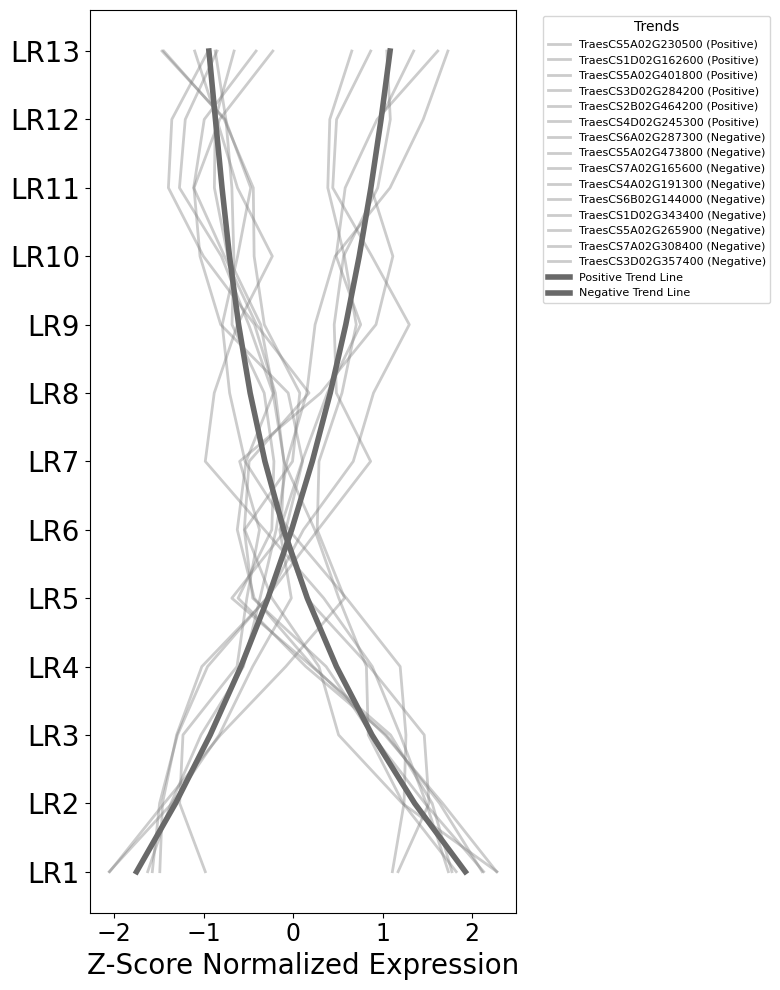

In [80]:
# Define categories (cell groups)
categories = ['LR1', 'LR2', 'LR3', 'LR4', 'LR5', 'LR6', 'LR7', 'LR8', 'LR9', 
              'LR10', 'LR11', 'LR12', 'LR13']

# Process the first dataset (positive correlations)
filtered_df_pos = top_correlations_LRs_df[top_correlations_LRs_df['Correlation'] > 0.80]
gene_list_pos = filtered_df_pos['Gene'].tolist()
filtered_data_pos = filtered_average_gene_expression_per_group.loc[categories, gene_list_pos]
lineplot_data_pos = filtered_data_pos.T
lineplot_data_zscore_pos = lineplot_data_pos.apply(zscore, axis=1)
average_trend_pos = lineplot_data_zscore_pos.mean(axis=0)
smoothed_average_trend_pos = savgol_filter(average_trend_pos, window_length=5, polyorder=2)
x = np.arange(len(categories))  # Numerical representation of cell groups
coeffs_pos = np.polyfit(x, smoothed_average_trend_pos, 3)
poly_fit_pos = np.polyval(coeffs_pos, x)

# Process the second dataset (negative correlations)
filtered_df_neg = top_correlations_LRs_df[top_correlations_LRs_df['Correlation'] < -0.80]
gene_list_neg = filtered_df_neg['Gene'].tolist()
filtered_data_neg = filtered_average_gene_expression_per_group.loc[categories, gene_list_neg]
lineplot_data_neg = filtered_data_neg.T
lineplot_data_zscore_neg = lineplot_data_neg.apply(zscore, axis=1)
average_trend_neg = lineplot_data_zscore_neg.mean(axis=0)  # Average only the negative group's points
smoothed_average_trend_neg = savgol_filter(average_trend_neg, window_length=5, polyorder=2)
coeffs_neg = np.polyfit(x, smoothed_average_trend_neg, 3)  # Fit only to negative group's smoothed average
poly_fit_neg = np.polyval(coeffs_neg, x)

# Plotting
plt.figure(figsize=(8, 10))

# Plot smoothed lines for each gene (positive correlations)
for row_name in lineplot_data_zscore_pos.index:
    smoothed_values = savgol_filter(lineplot_data_zscore_pos.loc[row_name, categories], 
                                    window_length=5, polyorder=2)
    plt.plot(smoothed_values, categories, label=f'{row_name} (Positive)', linewidth=2, color='grey', alpha=0.4)

# Plot smoothed lines for each gene (negative correlations)
for row_name in lineplot_data_zscore_neg.index:
    smoothed_values = savgol_filter(lineplot_data_zscore_neg.loc[row_name, categories], 
                                    window_length=5, polyorder=2)
    plt.plot(smoothed_values, categories, label=f'{row_name} (Negative)', linewidth=2, color='grey', alpha=0.4)

# Add trend lines
plt.plot(poly_fit_pos, categories, color='dimgrey', linestyle='-', linewidth=4, label='Positive Trend Line')
plt.plot(poly_fit_neg, categories, color='dimgrey', linestyle='-', linewidth=4, label='Negative Trend Line')

plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=20)

# Labels and formatting
plt.xlabel('Z-Score Normalized Expression', size = 20)
plt.yticks(rotation=0)
plt.legend(title="Trends", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_LR_gradients.svg', dpi=700, bbox_inches='tight', format='svg', transparent=True)
plt.show()



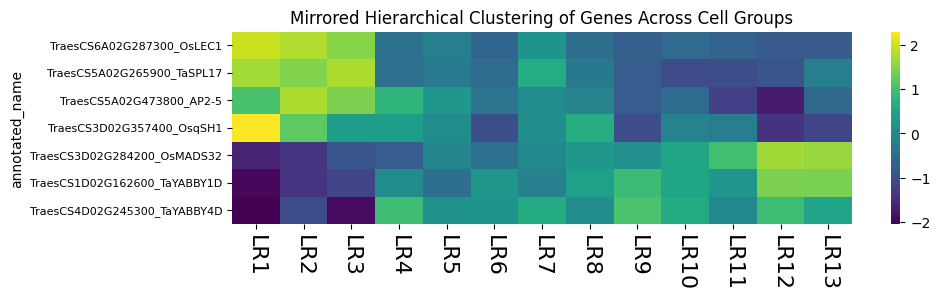

In [84]:
plt.figure(figsize=(10, 2.5))


# Define the categories in the desired order (cell groups)
categories = ['LR1', 'LR2', 'LR3', 'LR4', 'LR5', 'LR6', 'LR7', 'LR8', 'LR9', 
 'LR10', 'LR11', 'LR12', 'LR13']

# Define the genes to plot
genes_to_plot = ['TraesCS6A02G287300', 
                 'TraesCS5A02G265900', 'TraesCS5A02G473800', 'TraesCS3D02G357400', 
                 'TraesCS3D02G284200', 'TraesCS1D02G162600', 'TraesCS4D02G245300'
                 ]

# Filter the DataFrame to select only the desired categories and genes
filtered_data = filtered_average_gene_expression_per_group.loc[categories, genes_to_plot]

# Transpose for heatmap format (genes on y-axis, cell groups on x-axis)
heatmap_data = filtered_data.T
heatmap_data_zscore = heatmap_data.apply(zscore, axis=1)

# Annotate data
heatmap_data_zscore_Annotated = pd.merge(heatmap_data_zscore, annotation, left_index=True, right_index=True, how='left')
heatmap_data_zscore_Annotated.set_index('annotated_name', inplace=True)

# Perform hierarchical clustering on rows and get reordered indices
#row_linkage = linkage(heatmap_data_zscore_Annotated, method='average', metric='euclidean')
#row_order = leaves_list(row_linkage)[::-1]  # Reverse the clustering order

# Reorder rows based on the reversed clustering
#heatmap_data_reordered = heatmap_data_zscore_Annotated.iloc[row_order]

# Plot using the reordered data
ax = sns.heatmap(heatmap_data_zscore_Annotated, cmap='viridis', linewidths=0.0)
plt.title('Mirrored Hierarchical Clustering of Genes Across Cell Groups')

# Set the row label font size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize as needed
ax.set_xticklabels(ax.get_xticklabels(), rotation=270, ha='center', fontsize=10)  # Increase fontsize as needed

plt.tick_params(axis='x', labelsize=16)


plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_LR_heatmap.svg', dpi=700, bbox_inches='tight', format='svg', transparent=True)
plt.show()


### creating PCA plot for spikelet ridges only 

In [73]:
plt.style.use('default')

# exclude spiklet ridge groups 'SR' from the dataframe
filtered_data = filtered_average_gene_expression_per_group[~(
    filtered_average_gene_expression_per_group.index.str.startswith('LR'))]

# Step 1: Standardize the filtered data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Step 2: Perform PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 3: Retrieve explained variance for PC1 and PC2
explained_variance = pca.explained_variance_ratio_

# Step 4: Convert PCA result to a dataframe for easier plotting

# Invert PC1 and PC2 values
pca_result[:, 0] *= -1  # Invert PC1
pca_result[:, 1] *= -1  # Invert PC2

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=filtered_data.index)

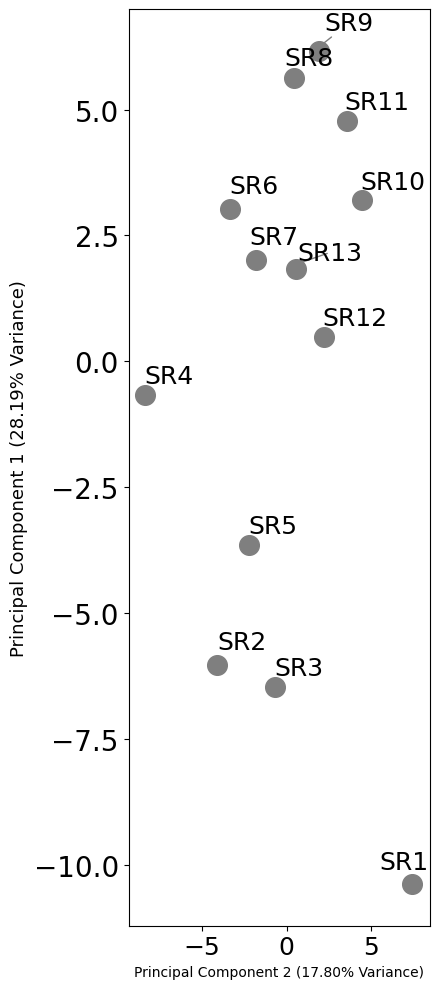

In [76]:
# Step 5: Plot the PCA results and add explained variance to axis labels
plt.figure(figsize=(4.5, 10))

# Scatter plot with custom color for 'SR' categories
texts = []  # For storing text objects for adjustText
for i, cell_group in enumerate(pca_df.index):
    plt.scatter(pca_df.iloc[i, 1], pca_df.iloc[i, 0], color='#7F7F7F', s=200)
    # Adjust the offset for text labels
    texts.append(plt.text(pca_df.iloc[i, 1] + 0.10, pca_df.iloc[i, 0] + 0.10, cell_group, fontsize=18)) 

# Adjust text positions to avoid overlap
adjust_text(texts, only_move={'points': 'y', 'texts': 'y'}, arrowprops=dict(arrowstyle='-', color='gray'))

plt.ylabel(f'Principal Component 1 ({explained_variance[0] * 100:.2f}% Variance)', fontsize=13)
plt.xlabel(f'Principal Component 2 ({explained_variance[1] * 100:.2f}% Variance)', fontsize=10)

plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=20)

# Extend the x-axis slightly
x_min, x_max = plt.xlim()
plt.xlim(x_min - 0.2, x_max + 0.3)

# Add grid lines (optional)
plt.grid(False)


# Show the plot
plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_SRPCA.svg', dpi=700, bbox_inches='tight', format='svg', transparent=True)
plt.show()

In [175]:
# Calculate the correlation of all genes with PC1
correlations = filtered_data.corrwith(pca_df['PC1'])

#saving correlation scores to make a supplementary table combined with LR scores 
correlations_SR = pd.DataFrame(correlations.copy())
correlations_SR = correlations.reset_index()
correlations_SR.columns = ['geneid', 'Corr_PC1_SRs']

# Sort by absolute value to get the strongest correlations (both positive and negative)
top_correlations_SRs = correlations.abs().sort_values(ascending=False).head(25)

# Convert this to a dataframe for easier visualization
top_correlations_SRs_df = pd.DataFrame({'Gene': top_correlations_SRs.index, 'Correlation': correlations[top_correlations_SRs.index]})

# Merge with annotation
top_correlations_SRs_df = pd.merge(top_correlations_SRs_df, annotation, left_on='Gene', right_index=True, how='inner')

top_correlations_SRs_df

Gene  Correlation  \
TraesCS3D02G357400  TraesCS3D02G357400    -0.922572   
TraesCS5D02G449200  TraesCS5D02G449200     0.914028   
TraesCS6A02G373500  TraesCS6A02G373500    -0.890685   
TraesCS7A02G246500  TraesCS7A02G246500    -0.890351   
TraesCS4A02G123800  TraesCS4A02G123800     0.877349   
TraesCS6D02G248300  TraesCS6D02G248300    -0.872818   
TraesCS4A02G256700  TraesCS4A02G256700     0.867609   
TraesCS5A02G549700  TraesCS5A02G549700     0.843138   
TraesCS4A02G016000  TraesCS4A02G016000     0.828829   
TraesCS3A02G246000  TraesCS3A02G246000     0.822369   
TraesCS2A02G174300  TraesCS2A02G174300    -0.819826   
TraesCS5B02G047200  TraesCS5B02G047200     0.819488   
TraesCS5A02G265900  TraesCS5A02G265900    -0.783418   
TraesCS5A02G401800  TraesCS5A02G401800     0.767250   
TraesCS7D02G246100  TraesCS7D02G246100    -0.746511   
TraesCS5A02G230500  TraesCS5A02G230500     0.735964   
TraesCS1A02G241400  TraesCS1A02G241400     0.732095   
TraesCS5B02G507300  TraesCS5B02G507300    -0.724171   
TraesCS2D02G256600  TraesCS2D02G256600    -0.724119   
TraesCS2B02G281000  TraesCS2B02G281000    -0.694769   
TraesCS7D02G342300  TraesCS7D02G342300    -0.690556   
TraesCS7D02G191600  TraesCS7D02G191600     0.689305   
TraesCS5B02G396700  TraesCS5B02G396700    -0.665299   
TraesCS3A02G441700  TraesCS3A02G441700    -0.664007   
TraesCS1D02G075700  TraesCS1D02G075700    -0.648462   

                                        annotated_name  
TraesCS3D02G357400           TraesCS3D02G357400_OsqSH1  
TraesCS5D02G449200                  TraesCS5D02G449200  
TraesCS6A02G373500        TraesCS6A02G373500_OsbHLH107  
TraesCS7A02G246500          TraesCS7A02G246500_TaSPL14  
TraesCS4A02G123800           TraesCS4A02G123800_TaAIL6  
TraesCS6D02G248300        TraesCS6D02G248300_OsKANADI1  
TraesCS4A02G256700          TraesCS4A02G256700_TaKNOX5  
TraesCS5A02G549700          TraesCS5A02G549700_OsHOX10  
TraesCS4A02G016000           TraesCS4A02G016000_TaILI3  
TraesCS3A02G246000           TraesCS3A02G246000_OsARF2  
TraesCS2A02G174300    TraesCS2A02G174300_FUL3_OsMADS18  
TraesCS5B02G047200          TraesCS5B02G047200_OsHOX33  
TraesCS5A02G265900          TraesCS5A02G265900_TaSPL17  
TraesCS5A02G401800          TraesCS5A02G401800_OsDof15  
TraesCS7D02G246100           TraesCS7D02G246100_OsCUC3  
TraesCS5A02G230500                  TraesCS5A02G230500  
TraesCS1A02G241400           TraesCS1A02G241400_OsUBQ7  
TraesCS5B02G507300                  TraesCS5B02G507300  
TraesCS2D02G256600           TraesCS2D02G256600_OsPLT8  
TraesCS2B02G281000    TraesCS2B02G281000_FUL2_OsMADS15  
TraesCS7D02G342300           TraesCS7D02G342300_OsCUC1  
TraesCS7D02G191600           TraesCS7D02G191600_TaPIN1  
TraesCS5B02G396700  TraesCS5B02G396700_SEP1-6_OsMADS34  
TraesCS3A02G441700                  TraesCS3A02G441700  
TraesCS1D02G075700          TraesCS1D02G075700_TaKNOX3

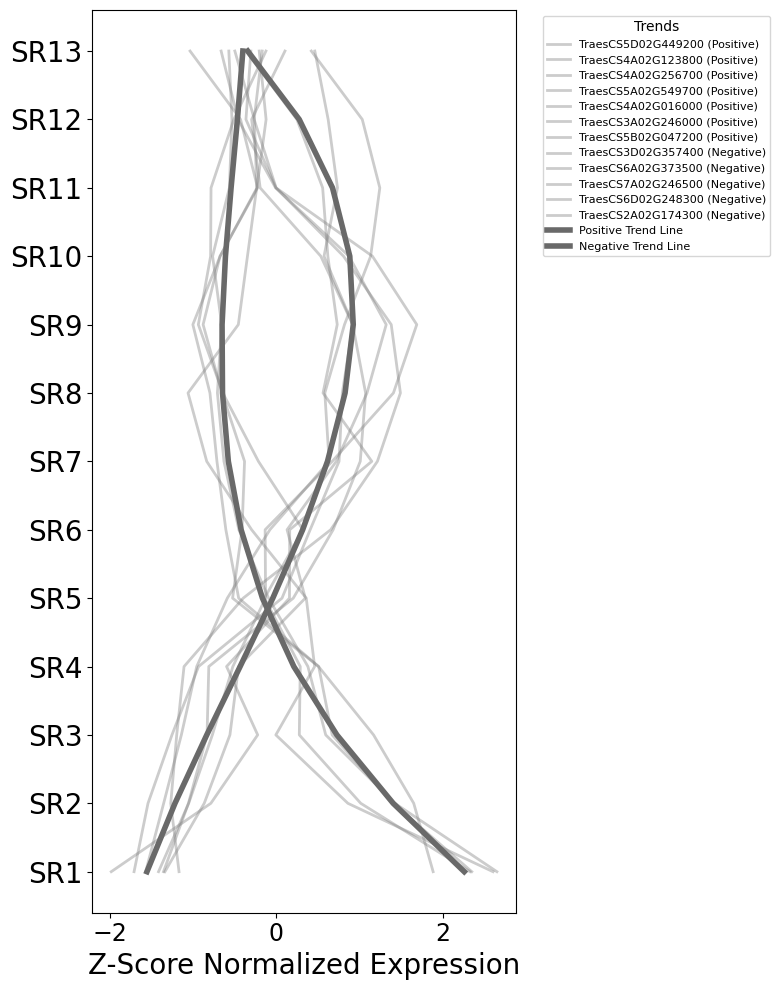

In [79]:
# Define categories (cell groups)
categories = ['SR1', 'SR2', 'SR3', 'SR4', 'SR5', 'SR6', 'SR7', 'SR8', 'SR9', 
              'SR10', 'SR11', 'SR12', 'SR13']

# Process the first dataset (positive correlations)
filtered_df_pos = top_correlations_SRs_df[top_correlations_SRs_df['Correlation'] > 0.80]
gene_list_pos = filtered_df_pos['Gene'].tolist()
filtered_data_pos = filtered_average_gene_expression_per_group.loc[categories, gene_list_pos]
lineplot_data_pos = filtered_data_pos.T
lineplot_data_zscore_pos = lineplot_data_pos.apply(zscore, axis=1)
average_trend_pos = lineplot_data_zscore_pos.mean(axis=0)
smoothed_average_trend_pos = savgol_filter(average_trend_pos, window_length=5, polyorder=2)
x = np.arange(len(categories))  # Numerical representation of cell groups
coeffs_pos = np.polyfit(x, smoothed_average_trend_pos, 3)
poly_fit_pos = np.polyval(coeffs_pos, x)

# Process the second dataset (negative correlations)
filtered_df_neg = top_correlations_SRs_df[top_correlations_SRs_df['Correlation'] < -0.80]
gene_list_neg = filtered_df_neg['Gene'].tolist()
filtered_data_neg = filtered_average_gene_expression_per_group.loc[categories, gene_list_neg]
lineplot_data_neg = filtered_data_neg.T
lineplot_data_zscore_neg = lineplot_data_neg.apply(zscore, axis=1)
average_trend_neg = lineplot_data_zscore_neg.mean(axis=0)  # Average only the negative group's points
smoothed_average_trend_neg = savgol_filter(average_trend_neg, window_length=5, polyorder=2)
coeffs_neg = np.polyfit(x, smoothed_average_trend_neg, 3)  # Fit only to negative group's smoothed average
poly_fit_neg = np.polyval(coeffs_neg, x)

# Plotting
plt.figure(figsize=(8, 10))

# Plot smoothed lines for each gene (positive correlations)
for row_name in lineplot_data_zscore_pos.index:
    smoothed_values = savgol_filter(lineplot_data_zscore_pos.loc[row_name, categories], 
                                    window_length=5, polyorder=2)
    plt.plot(smoothed_values, categories, label=f'{row_name} (Positive)', linewidth=2, color='grey', alpha=0.4)

# Plot smoothed lines for each gene (negative correlations)
for row_name in lineplot_data_zscore_neg.index:
    smoothed_values = savgol_filter(lineplot_data_zscore_neg.loc[row_name, categories], 
                                    window_length=5, polyorder=2)
    plt.plot(smoothed_values, categories, label=f'{row_name} (Negative)', linewidth=2, color='grey', alpha=0.4)

# Add trend lines
plt.plot(poly_fit_pos, categories, color='dimgrey', linestyle='-', linewidth=4, label='Positive Trend Line')
plt.plot(poly_fit_neg, categories, color='dimgrey', linestyle='-', linewidth=4, label='Negative Trend Line')

plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=20)

# Labels and formatting
plt.xlabel('Z-Score Normalized Expression', size = 20)
plt.yticks(rotation=0)
plt.legend(title="Trends", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_SR_gradients.svg', dpi=700, bbox_inches='tight', format='svg', transparent=True)
plt.show()



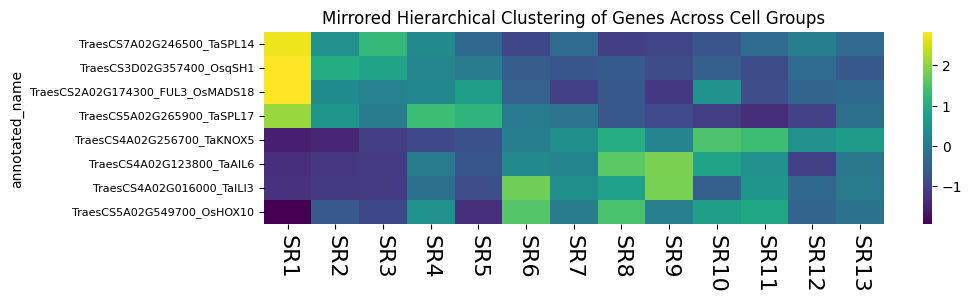

In [72]:
plt.figure(figsize=(10, 2.5))

# Define the categories in the desired order (cell groups)
categories = ['SR1', 'SR2', 'SR3', 'SR4', 'SR5', 'SR6', 'SR7', 'SR8', 'SR9', 
              'SR10', 'SR11', 'SR12', 'SR13']

# Define the genes to plot
genes_to_plot = ['TraesCS7A02G246500', 'TraesCS3D02G357400', 'TraesCS2A02G174300', 'TraesCS5A02G265900','TraesCS4A02G256700', 'TraesCS4A02G123800', 'TraesCS4A02G016000',  'TraesCS5A02G549700']


# Filter the DataFrame to select only the desired categories and genes
filtered_data = filtered_average_gene_expression_per_group.loc[categories, genes_to_plot]

# Transpose for heatmap format (genes on y-axis, cell groups on x-axis)
heatmap_data = filtered_data.T
heatmap_data_zscore = heatmap_data.apply(zscore, axis=1)

# Annotate data
heatmap_data_zscore_Annotated = pd.merge(heatmap_data_zscore, annotation, left_index=True, right_index=True, how='left')
heatmap_data_zscore_Annotated.set_index('annotated_name', inplace=True)


# Plot using the reordered data
ax = sns.heatmap(heatmap_data_zscore_Annotated, cmap='viridis', linewidths=0.0)
plt.title('Mirrored Hierarchical Clustering of Genes Across Cell Groups')

# Set the row label font size
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust fontsize as needed
ax.set_xticklabels(ax.get_xticklabels(), rotation=270, ha='center', fontsize=10)  # Increase fontsize as needed

plt.tick_params(axis='x', labelsize=16)


plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_SR_gradients.svg', dpi=700, bbox_inches='tight', format='svg', transparent=True)
plt.show()


## Generating a summary file of correlations to PC1 for both leaf ridges and spikelet ridges 

I want to make a file that summarises 

(Supplementary Table 15) 

In [179]:
merged_correlations = correlations_SR.merge(correlations_LR, on='geneid', how='inner')
merged_correlations.to_csv("latedoubleridge_expressionanalysis/PC1correlation_scores_SRLRgroups.csv", index=False)

## Generating a summary file for all groupings used 

I want to make one file that captures all cells in my sample, which are considered inflorescence, and which are used in leaf ridge and spikelet ridge groupings 
</p>
(Supplementary Table 13) 

In [143]:
cellsinspike_categories = cellsinspike_VGN1e1.rename(columns={'cell_id': 'EntityID'})
cellsinspike_categories['inflorescence_category'] = 'inflorescence'

cellgroups_categories = cellgroups.copy() 
cellgroups_categories = cellgroups_categories.reset_index().rename(columns={'index': 'EntityID', 'Custom cell groups': 'LRSRgrouping'})

# Filter to create a new AnnData object with only the sample 'VGN1e1'
adata_VGN1e1 = adata_spatial[adata_spatial.obs['dataset'] == 'VGN1e1'].copy()

adata_VGN1e1.obs.index = [index.split('-')[0] for index in adata_VGN1e1.obs.index]

# Convert adata_VGN1e1.obs to a dataframe and reset the index to make the index a column
adata_VGN1e1_df = adata_VGN1e1.obs.reset_index()

# Rename the index column if necessary (for example, to 'cell_id')
adata_VGN1e1_df = adata_VGN1e1_df.rename(columns={'index': 'EntityID'})

# Step 1: Filter adata_VGN1e1_df to include only the specified columns
filtered_adata_VGN1e1_df = adata_VGN1e1_df[['EntityID', 'dataset', 'clusters']]

# Step 2: Perform a left merge with cellsinspike_categories and cellgroups_categories on 'EntityID'
merged_cellcategory_df = filtered_adata_VGN1e1_df.merge(cellsinspike_categories, on='EntityID', how='left').merge(cellgroups_categories, on='EntityID', how='left')
merged_cellcategory_df

merged_cellcategory_df.to_csv("latedoubleridge_expressionanalysis/CellCategories_VGN1e1_inflorescence_SRLRgroups.csv", index=False)

## Making Visualisations of domain maps and transcripts 

In [17]:
segmentation_df = gpd.read_parquet('cell_segmentation/VGN1e_region1_output/cellpose2_micron_space_VGN1e1.parquet')

transcripts_df = pd.read_csv('cell_segmentation/VGN1e_region1_output/detected_transcripts_VGN1e1.csv') 

In [18]:
# Filter to create a new AnnData object with only the sample 'VGN1e1'
adata_VGN1e1 = adata_spatial[adata_spatial.obs['dataset'] == 'VGN1e1'].copy()

adata_VGN1e1.obs.index = [index.split('-')[0] for index in adata_VGN1e1.obs.index]

# Convert adata_VGN1e1.obs to a dataframe and reset the index to make the index a column
adata_VGN1e1_df = adata_VGN1e1.obs.reset_index()

# Rename the index column if necessary (for example, to 'cell_id')
adata_VGN1e1_df = adata_VGN1e1_df.rename(columns={'index': 'cell_id'})

In [19]:
adata_VGN1e1_df['cell_id'] = adata_VGN1e1_df['cell_id'].astype(str).str.strip()
cell_ids = adata_VGN1e1_df['cell_id'].tolist()
cell_ids = [cell_id.strip() for cell_id in cell_ids]

# Convert EntityID in filtered_segmentation_df to strings to match with cell_ids
filtered_segmentation_df = segmentation_df.copy()
filtered_segmentation_df['EntityID'] = filtered_segmentation_df['EntityID'].astype(str)

# Now filter based on matching values in cell_ids
filtered_segmentation_df = filtered_segmentation_df[filtered_segmentation_df['EntityID'].isin(cell_ids)]
filtered_segmentation_df

ID             EntityID  ZIndex  \
48334  48334  2343479300017100075       1   
48829  48829  2343479300017100075       6   
48664  48664  2343479300017100075       0   
48499  48499  2343479300017100075       5   
48004  48004  2343479300017100075       2   
...      ...                  ...     ...   
28175  28175  2343479300098100014       2   
28195  28195  2343479300098100014       0   
28200  28200  2343479300098100014       6   
28185  28185  2343479300098100014       1   
28170  28170  2343479300098100014       3   

                                                Geometry ParentType ParentID  \
48334  MULTIPOLYGON (((3408.174 6460.388, 3408.210 64...       None     None   
48829  MULTIPOLYGON (((3408.174 6460.388, 3408.210 64...       None     None   
48664  MULTIPOLYGON (((3408.174 6460.388, 3408.210 64...       None     None   
48499  MULTIPOLYGON (((3408.174 6460.388, 3408.210 64...       None     None   
48004  MULTIPOLYGON (((3408.174 6460.388, 3408.210 64...       None     None   
...                                                  ...        ...      ...   
28175  MULTIPOLYGON (((4221.030 7741.360, 4222.109 77...       None     None   
28195  MULTIPOLYGON (((4221.030 7741.360, 4222.109 77...       None     None   
28200  MULTIPOLYGON (((4221.030 7741.360, 4222.109 77...       None     None   
28185  MULTIPOLYGON (((4221.030 7741.360, 4222.109 77...       None     None   
28170  MULTIPOLYGON (((4221.030 7741.360, 4222.109 77...       None     None   

       Type  ZLevel  Name  
48334  cell     3.0  None  
48829  cell    10.5  None  
48664  cell     1.5  None  
48499  cell     9.0  None  
48004  cell     4.5  None  
...     ...     ...   ...  
28175  cell     4.5  None  
28195  cell     1.5  None  
28200  cell    10.5  None  
28185  cell     3.0  None  
28170  cell     6.0  None  

[15463 rows x 9 columns]

In [20]:
# Ensure segmentation_df is a GeoDataFrame
filtered_segmentation_df = gpd.GeoDataFrame(filtered_segmentation_df, geometry='Geometry')

# Convert transcripts_df to GeoDataFrame
transcripts_gdf = gpd.GeoDataFrame(
    transcripts_df,
    geometry=gpd.points_from_xy(transcripts_df['global_x'], transcripts_df['global_y'])
)

# Perform spatial join and drop duplicate rows
filtered_transcripts_gdf = gpd.sjoin(
    transcripts_gdf,
    filtered_segmentation_df[['EntityID', 'Geometry']],
    how='inner',
    predicate='within'
)

# Remove unnecessary columns and duplicates
filtered_transcripts_df = (
    filtered_transcripts_gdf
    .drop(columns=['index_right', 'Unnamed: 0'], errors='ignore')  # Drop join-related columns
    .drop_duplicates()  # Remove duplicate rows
)

# Reset the index for clarity
filtered_transcripts_df.reset_index(drop=True, inplace=True)

# Display result
filtered_transcripts_df


barcode_id   global_x   global_y  global_z          x           y  \
0               38  3446.3018  7837.6090       1.0  388.12305   474.39932   
1               40  3444.9426  7839.1235       1.0  375.53894   488.42523   
2               70  3444.9240  7838.3220       1.0  375.36667   481.00000   
3               93  3442.4006  7835.5137       1.0  352.00000   455.00000   
4               98  3444.8670  7839.4214       1.0  374.83790   491.18338   
...            ...        ...        ...       ...        ...         ...   
325696         129  4121.7773  6368.6880       6.0  971.40650  1758.59350   
325697         196  4116.4194  6367.1820       6.0  921.79400  1744.65250   
325698         196  4120.6953  6369.7456       6.0  961.38745  1768.38750   
325699         211  4115.4690  6368.1646       6.0  913.00000  1753.74580   
325700         245  4123.5693  6371.2160       6.0  988.00000  1782.00000   

        fov                gene         transcript_id              cell_id  \
0        75  TraesCS3D02G284200  TraesCS3D02G284200_1  2343479300095100291   
1        75  TraesCS1A02G199600  TraesCS1A02G199600_2  2343479300095100291   
2        75  TraesCS7D02G246100  TraesCS7D02G246100_1  2343479300095100291   
3        75  TraesCS3B02G435700  TraesCS3B02G435700_1  2343479300095100291   
4        75  TraesCS4D02G076900  TraesCS4D02G076900_1  2343479300095100291   
...     ...                 ...                   ...                  ...   
325696  199  TraesCS7A02G313100  TraesCS7A02G313100_3  2343479300019100003   
325697  199  TraesCS2B02G260800  TraesCS2B02G260800_1  2343479300019100003   
325698  199  TraesCS2B02G260800  TraesCS2B02G260800_1  2343479300019100003   
325699  199  TraesCS2A02G114900  TraesCS2A02G114900_1  2343479300019100003   
325700  199  TraesCS2A02G391100  TraesCS2A02G391100_2  2343479300019100003   

                         geometry             EntityID  
0       POINT (3446.302 7837.609)  2343479300095100291  
1       POINT (3444.943 7839.123)  2343479300095100291  
2       POINT (3444.924 7838.322)  2343479300095100291  
3       POINT (3442.401 7835.514)  2343479300095100291  
4       POINT (3444.867 7839.421)  2343479300095100291  
...                           ...                  ...  
325696  POINT (4121.777 6368.688)  2343479300019100003  
325697  POINT (4116.419 6367.182)  2343479300019100003  
325698  POINT (4120.695 6369.746)  2343479300019100003  
325699  POINT (4115.469 6368.165)  2343479300019100003  
325700  POINT (4123.569 6371.216)  2343479300019100003  

[325701 rows x 12 columns]

In [21]:
adata_VGN1e1_df = adata_VGN1e1.obs[['clusters']].copy()
adata_VGN1e1_df.index = adata_VGN1e1_df.index.astype(str)  # Ensure the index is a string if necessary
filtered_segmentation_df['EntityID'] = filtered_segmentation_df['EntityID'].astype(str)
merged_df = filtered_segmentation_df.merge(adata_VGN1e1_df, left_on='EntityID', right_index=True)
merged_df

ID             EntityID  ZIndex  \
48334  48334  2343479300017100075       1   
48829  48829  2343479300017100075       6   
48664  48664  2343479300017100075       0   
48499  48499  2343479300017100075       5   
48004  48004  2343479300017100075       2   
...      ...                  ...     ...   
28175  28175  2343479300098100014       2   
28195  28195  2343479300098100014       0   
28200  28200  2343479300098100014       6   
28185  28185  2343479300098100014       1   
28170  28170  2343479300098100014       3   

                                                Geometry ParentType ParentID  \
48334  MULTIPOLYGON (((3408.174 6460.388, 3408.210 64...       None     None   
48829  MULTIPOLYGON (((3408.174 6460.388, 3408.210 64...       None     None   
48664  MULTIPOLYGON (((3408.174 6460.388, 3408.210 64...       None     None   
48499  MULTIPOLYGON (((3408.174 6460.388, 3408.210 64...       None     None   
48004  MULTIPOLYGON (((3408.174 6460.388, 3408.210 64...       None     None   
...                                                  ...        ...      ...   
28175  MULTIPOLYGON (((4221.030 7741.360, 4222.109 77...       None     None   
28195  MULTIPOLYGON (((4221.030 7741.360, 4222.109 77...       None     None   
28200  MULTIPOLYGON (((4221.030 7741.360, 4222.109 77...       None     None   
28185  MULTIPOLYGON (((4221.030 7741.360, 4222.109 77...       None     None   
28170  MULTIPOLYGON (((4221.030 7741.360, 4222.109 77...       None     None   

       Type  ZLevel  Name clusters  
48334  cell     3.0  None        6  
48829  cell    10.5  None        6  
48664  cell     1.5  None        6  
48499  cell     9.0  None        6  
48004  cell     4.5  None        6  
...     ...     ...   ...      ...  
28175  cell     4.5  None       12  
28195  cell     1.5  None       12  
28200  cell    10.5  None       12  
28185  cell     3.0  None       12  
28170  cell     6.0  None       12  

[15463 rows x 10 columns]

First I will make domain maps for Figure 5A-B

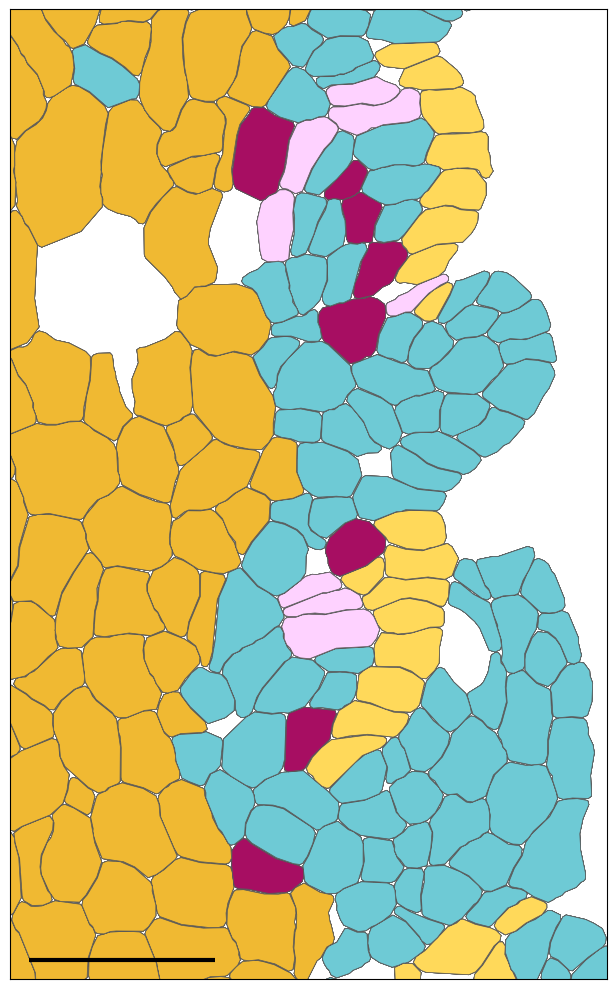

In [62]:
import numpy as np
import math
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches

# Define custom colors for specific clusters
custom_cluster_colors = {
    '0': '#a70e62', 
    '12': '#6ecad5',
    '3': '#f0b932', 
    '11': '#fed2ff',
    '4': '#ffd95a'
}

# Default color for unspecified clusters
default_color = 'none'

# Define rotation parameters
angle = -22  # Degrees
radians = math.radians(angle)
cos_angle = math.cos(radians)
sin_angle = math.sin(radians)
rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])

# Calculate the center of the filtered segmentation data for rotation
segmentation_center_x = merged_df['Geometry'].centroid.x.mean()
segmentation_center_y = merged_df['Geometry'].centroid.y.mean()

# Apply rotation and assign cluster colors to each Polygon
rotated_patches_list = []
for _, row in merged_df.iterrows():
    shape = row['Geometry']
    cluster = str(row['clusters'])  # Convert cluster to string to match custom colors dict keys

    # Assign color based on cluster and set edge color based on whether it's default
    if cluster in custom_cluster_colors:
        color = custom_cluster_colors[cluster]
        edge_color = '#595959'  # Default edge color for specified clusters
    else:
        color = default_color
        edge_color = 'none'  # Edge color for unspecified clusters

    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            centered_coords = np.array(poly.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            rotated_poly = Polygon(rotated_coords)
            patch = patches.Polygon(rotated_coords, closed=True, facecolor=color, edgecolor=edge_color, linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        centered_coords = np.array(shape.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        rotated_poly = Polygon(rotated_coords)
        patch = patches.Polygon(rotated_coords, closed=True, facecolor=color, edgecolor=edge_color, linewidth=0.5)
        rotated_patches_list.append(patch)


# Plot the rotated and colored polygons
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Calculate axis limits
rotated_x_coords = [coord[0] for patch in rotated_patches_list for coord in patch.get_xy()]
rotated_y_coords = [coord[1] for patch in rotated_patches_list for coord in patch.get_xy()]
x_min, x_max = min(rotated_x_coords), max(rotated_x_coords)
y_min, y_max = min(rotated_y_coords), max(rotated_y_coords)

# Set axis limits
ax.set_ylim(6950, 7210)
ax.set_xlim(3950, 4110)
ax.set_aspect('equal')

# Add a 25-micron scale bar
scale_bar_length = 50  # Microns
x_start = 3955  # Starting x-coordinate of the scale bar
y_start = 6955  # Starting y-coordinate of the scale bar
x_end = x_start + scale_bar_length  # Ending x-coordinate of the scale bar

# Draw the scale bar line
ax.hlines(y_start, x_start, x_end, colors='black', linewidth=3)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_domainmap_basal_Scalebar50.png', bbox_inches='tight', format='png', dpi = 700)
plt.tight_layout()
plt.show()


now adding transcripts to same area 

In [23]:
clusters_to_include = ['0', '3', '4', '12', '11']  # Example cluster list

genes_of_interest = {
    'TraesCS4A02G256700': '#C51D71', #knox
    'TraesCS1A02G418200': 'darkturquoise', #nl1
    'TraesCS7D02G246100': '#F57BEC'#cuc
}

# I want to filter down my datasets to make this process faster to map the cell segmentation and transcripts
# Step 1: Filter `merged_df` to include only selected clusters
filtered_merged_df = merged_df[merged_df['clusters'].astype(str).isin(clusters_to_include)]
# Convert the 'EntityID' column of filtered_merged_df into a list
entity_id_list = filtered_merged_df['EntityID'].tolist()

#note, I will use the original merged_df for the graph because this mantains the same segmentation_center_x and segmentation_center_y 

In [24]:
# Filter filtered_transcripts_df to contain only rows where 'EntityID' is in the list and only genes of interest 
filtered_transcripts_df2 = filtered_transcripts_df.copy()
filtered_transcripts_df2 = filtered_transcripts_df2[filtered_transcripts_df2['EntityID'].isin(entity_id_list)]
filtered_transcripts_df2 = filtered_transcripts_df2[filtered_transcripts_df2['gene'].isin(genes_of_interest.keys())]

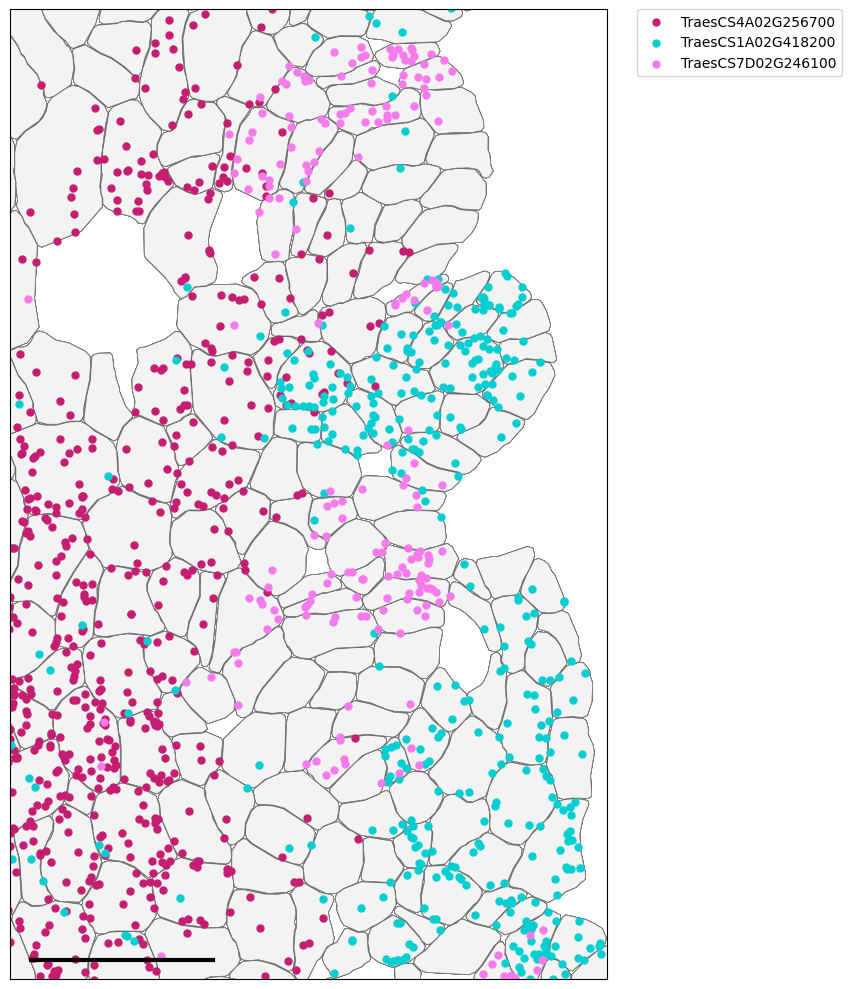

In [25]:

# Define rotation parameters
angle = -22  # Degrees
radians = math.radians(angle)
cos_angle = math.cos(radians)
sin_angle = math.sin(radians)
rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])

# Calculate the center of the segmentation data for rotation
segmentation_center_x = merged_df['Geometry'].centroid.x.mean()
segmentation_center_y = merged_df['Geometry'].centroid.y.mean()

rotated_patches_list = []
for _, row in filtered_merged_df.iterrows():
    shape = row['Geometry']
    cluster = str(row['clusters'])  # Ensure clusters are strings to match the keys in the color dictionary

    # Set face and edge colors for included clusters
    face_color = '#F3F3F3'  # Default fill color for included clusters
    edge_color = 'dimgrey'  # Default edge color

    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            centered_coords = np.array(poly.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        centered_coords = np.array(shape.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
        rotated_patches_list.append(patch)

# Step 2: Rotate transcript coordinates without filtering by polygon containment
rotated_transcript_data = {}
for gene, color in genes_of_interest.items():
    transcripts_of_interest = filtered_transcripts_df2[filtered_transcripts_df2['gene'] == gene].copy()
    transcript_coords = transcripts_of_interest[['global_x', 'global_y']].to_numpy()

    # Rotate coordinates
    centered_transcript_coords = transcript_coords - np.array([segmentation_center_x, segmentation_center_y])
    rotated_transcript_coords = np.dot(centered_transcript_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])

    # Store rotated coordinates and color for plotting
    rotated_transcript_data[gene] = {
        'x': rotated_transcript_coords[:, 0],
        'y': rotated_transcript_coords[:, 1],
        'color': color
    }

# Plot the rotated segmentation and transcripts
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated segmentation polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Plot each gene's rotated transcripts with unique colors
for gene, data in rotated_transcript_data.items():
    ax.scatter(data['x'], data['y'], color=data['color'], s=25, alpha=1, label=gene)

# Set axis limits
ax.set_ylim(6950, 7210)
ax.set_xlim(3950, 4110)
ax.set_aspect('equal')

# Add a 25-micron scale bar
scale_bar_length = 50  # Microns
x_start = 3955  # Starting x-coordinate of the scale bar
y_start = 6955  # Starting y-coordinate of the scale bar
x_end = x_start + scale_bar_length  # Ending x-coordinate of the scale bar

# Place the legend outside the plot
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0)

# Draw the scale bar line
ax.hlines(y_start, x_start, x_end, colors='black', linewidth=3)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_transcriptmap_basal_Scalebar50.png', dpi=700, bbox_inches='tight', format='png')
plt.show()


### domain maps and transcript maps for upper spikelet ridges 

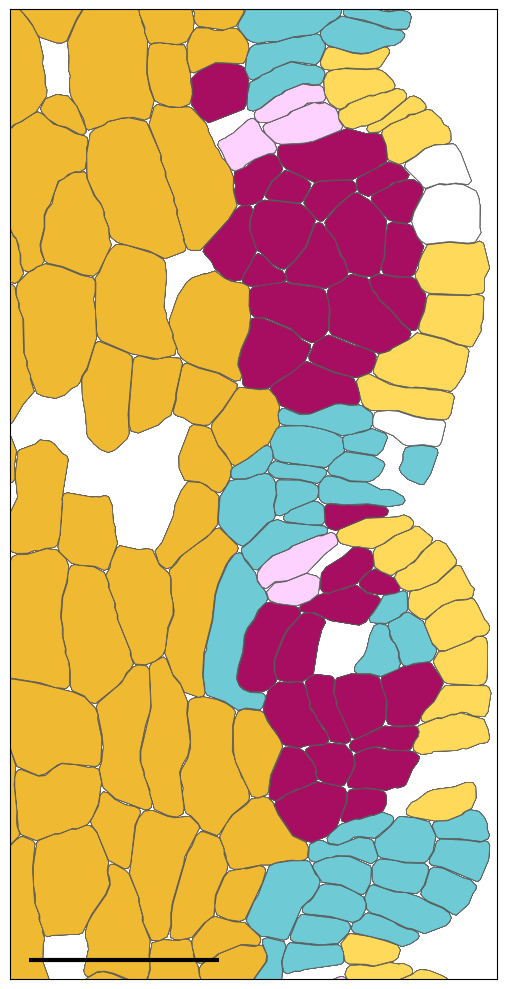

In [64]:
import numpy as np
import math
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.patches as patches

# Define custom colors for specific clusters
custom_cluster_colors = {
    '0': '#a70e62', 
    '12': '#6ecad5',
    '3': '#f0b932', 
    '11': '#fed2ff',
    '4': '#ffd95a',
    '1': 'white',
    '2': 'white'
}

# Default color for unspecified clusters
default_color = 'none'

# Define rotation parameters
angle = -22  # Degrees
radians = math.radians(angle)
cos_angle = math.cos(radians)
sin_angle = math.sin(radians)
rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])

# Calculate the center of the filtered segmentation data for rotation
segmentation_center_x = merged_df['Geometry'].centroid.x.mean()
segmentation_center_y = merged_df['Geometry'].centroid.y.mean()

# Apply rotation and assign cluster colors to each Polygon
rotated_patches_list = []
for _, row in merged_df.iterrows():
    shape = row['Geometry']
    cluster = str(row['clusters'])  # Convert cluster to string to match custom colors dict keys

    # Assign color based on cluster and set edge color based on whether it's default
    if cluster in custom_cluster_colors:
        color = custom_cluster_colors[cluster]
        edge_color = '#595959'  # Default edge color for specified clusters
    else:
        color = default_color
        edge_color = 'none'  # Edge color for unspecified clusters

    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            centered_coords = np.array(poly.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            rotated_poly = Polygon(rotated_coords)
            patch = patches.Polygon(rotated_coords, closed=True, facecolor=color, edgecolor=edge_color, linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        centered_coords = np.array(shape.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        rotated_poly = Polygon(rotated_coords)
        patch = patches.Polygon(rotated_coords, closed=True, facecolor=color, edgecolor=edge_color, linewidth=0.5)
        rotated_patches_list.append(patch)


# Plot the rotated and colored polygons
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Calculate axis limits
rotated_x_coords = [coord[0] for patch in rotated_patches_list for coord in patch.get_xy()]
rotated_y_coords = [coord[1] for patch in rotated_patches_list for coord in patch.get_xy()]
x_min, x_max = min(rotated_x_coords), max(rotated_x_coords)
y_min, y_max = min(rotated_y_coords), max(rotated_y_coords)

# Set axis limits
ax.set_ylim(7315, 7570)
ax.set_xlim(3960, 4088)
ax.set_aspect('equal')

# Add a 25-micron scale bar
scale_bar_length = 50  # Microns
x_start = 3965  # Starting x-coordinate of the scale bar
y_start = 7320  # Starting y-coordinate of the scale bar
x_end = x_start + scale_bar_length  # Ending x-coordinate of the scale bar

# Draw the scale bar line
ax.hlines(y_start, x_start, x_end, colors='black', linewidth=3)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])


plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_domainmap_central_Scalebar50.png', dpi=700, bbox_inches='tight', format='png')
plt.show()


In [65]:
clusters_to_include = ['0', '3', '4', '12', '11', '1', '2' ] 


genes_of_interest = {
    'TraesCS4A02G256700': '#C51D71', #knox
    'TraesCS1A02G418200': 'darkturquoise', #nl1
    'TraesCS7D02G246100': '#F57BEC'#cuc
}

# I want to filter down my datasets to make this process faster to map the cell segmentation and transcripts
# Step 1: Filter `merged_df` to include only selected clusters
filtered_merged_df = merged_df[merged_df['clusters'].astype(str).isin(clusters_to_include)]
# Convert the 'EntityID' column of filtered_merged_df into a list
entity_id_list = filtered_merged_df['EntityID'].tolist()

#note, I will use the original merged_df for the graph because this mantains the same segmentation_center_x and segmentation_center_y 

In [66]:
# Filter filtered_transcripts_df to contain only rows where 'EntityID' is in the list and only genes of interest 
filtered_transcripts_df2 = filtered_transcripts_df.copy()
filtered_transcripts_df2 = filtered_transcripts_df2[filtered_transcripts_df2['EntityID'].isin(entity_id_list)]
filtered_transcripts_df2 = filtered_transcripts_df2[filtered_transcripts_df2['gene'].isin(genes_of_interest.keys())]

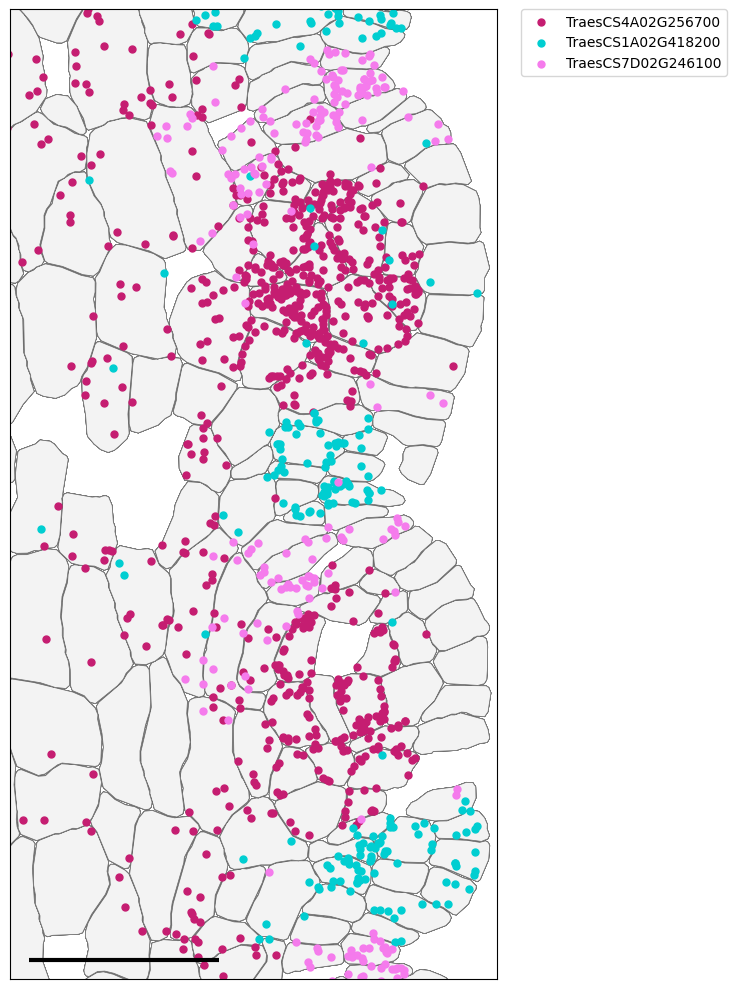

In [67]:

# Define rotation parameters
angle = -22  # Degrees
radians = math.radians(angle)
cos_angle = math.cos(radians)
sin_angle = math.sin(radians)
rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])

# Calculate the center of the segmentation data for rotation
segmentation_center_x = merged_df['Geometry'].centroid.x.mean()
segmentation_center_y = merged_df['Geometry'].centroid.y.mean()

rotated_patches_list = []
for _, row in filtered_merged_df.iterrows():
    shape = row['Geometry']
    cluster = str(row['clusters'])  # Ensure clusters are strings to match the keys in the color dictionary

    # Set face and edge colors for included clusters
    face_color = '#F3F3F3'  # Default fill color for included clusters
    edge_color = 'dimgrey'  # Default edge color

    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            centered_coords = np.array(poly.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        centered_coords = np.array(shape.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
        rotated_patches_list.append(patch)

# Step 2: Rotate transcript coordinates without filtering by polygon containment
rotated_transcript_data = {}
for gene, color in genes_of_interest.items():
    transcripts_of_interest = filtered_transcripts_df2[filtered_transcripts_df2['gene'] == gene].copy()
    transcript_coords = transcripts_of_interest[['global_x', 'global_y']].to_numpy()

    # Rotate coordinates
    centered_transcript_coords = transcript_coords - np.array([segmentation_center_x, segmentation_center_y])
    rotated_transcript_coords = np.dot(centered_transcript_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])

    # Store rotated coordinates and color for plotting
    rotated_transcript_data[gene] = {
        'x': rotated_transcript_coords[:, 0],
        'y': rotated_transcript_coords[:, 1],
        'color': color
    }

# Plot the rotated segmentation and transcripts
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated segmentation polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Plot each gene's rotated transcripts with unique colors
for gene, data in rotated_transcript_data.items():
    ax.scatter(data['x'], data['y'], color=data['color'], s=25, alpha=1, label=gene)


# Set axis limits
ax.set_ylim(7315, 7570)
ax.set_xlim(3960, 4088)
ax.set_aspect('equal')

# Add a 25-micron scale bar
scale_bar_length = 50  # Microns
x_start = 3965  # Starting x-coordinate of the scale bar
y_start = 7320  # Starting y-coordinate of the scale bar
x_end = x_start + scale_bar_length  # Ending x-coordinate of the scale bar


# Place the legend outside the plot
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0)

# Draw the scale bar line
ax.hlines(y_start, x_start, x_end, colors='black', linewidth=3)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_transcriptnmap_central_Scalebar50.png', dpi=700, bbox_inches='tight', format='png')
plt.show()


### Mapping out the transcripts for select genes for figure 5G and 5L

In [30]:
clusters_to_include = ['0', '3', '4', '12', '11', '1', '2', '9', '13', '6']  # Example cluster list

genes_of_interest = {
    'TraesCS3D02G357400': '#7CD250', #qSH1
    'TraesCS4A02G123800': '#34618D'

}

# I want to filter transcripts by only in the cells of interest, I need to do the following filter steps to make a list of cells of interest.. 
# Step 1: Filter `merged_df` to include only selected clusters
filtered_merged_df = merged_df[merged_df['clusters'].astype(str).isin(clusters_to_include)]
# Convert the 'EntityID' column of filtered_merged_df into a list
entity_id_list = filtered_merged_df['EntityID'].tolist()

#note, I will use the original merged_df for the graph because this mantains the same segmentation_center_x and segmentation_center_y 

In [31]:
# Filter filtered_transcripts_df to contain only rows where 'EntityID' is in the list and only genes of interest 
filtered_transcripts_df2 = filtered_transcripts_df.copy()
filtered_transcripts_df2 = filtered_transcripts_df2[filtered_transcripts_df2['EntityID'].isin(entity_id_list)]
filtered_transcripts_df2 = filtered_transcripts_df2[filtered_transcripts_df2['gene'].isin(genes_of_interest.keys())]

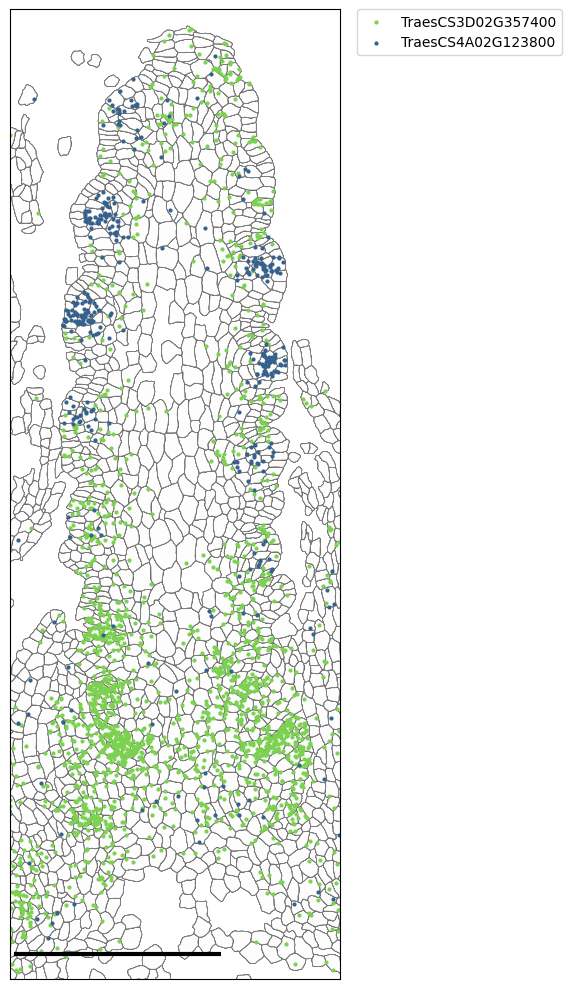

In [32]:

# Define rotation parameters
angle = -22  # Degrees
radians = math.radians(angle)
cos_angle = math.cos(radians)
sin_angle = math.sin(radians)
rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])

# Calculate the center of the segmentation data for rotation
segmentation_center_x = merged_df['Geometry'].centroid.x.mean()
segmentation_center_y = merged_df['Geometry'].centroid.y.mean()

rotated_patches_list = []
for _, row in filtered_merged_df.iterrows():
    shape = row['Geometry']
    cluster = str(row['clusters'])  # Ensure clusters are strings to match the keys in the color dictionary

    # Set face and edge colors for included clusters
    face_color = '#FDFDFD'  # Default fill color for included clusters
    edge_color = 'dimgrey'  # Default edge color

    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            centered_coords = np.array(poly.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        centered_coords = np.array(shape.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
        rotated_patches_list.append(patch)

# Step 2: Rotate transcript coordinates without filtering by polygon containment
rotated_transcript_data = {}
for gene, color in genes_of_interest.items():
    transcripts_of_interest = filtered_transcripts_df2[filtered_transcripts_df2['gene'] == gene].copy()
    transcript_coords = transcripts_of_interest[['global_x', 'global_y']].to_numpy()

    # Rotate coordinates
    centered_transcript_coords = transcript_coords - np.array([segmentation_center_x, segmentation_center_y])
    rotated_transcript_coords = np.dot(centered_transcript_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])

    # Store rotated coordinates and color for plotting
    rotated_transcript_data[gene] = {
        'x': rotated_transcript_coords[:, 0],
        'y': rotated_transcript_coords[:, 1],
        'color': color
    }

# Plot the rotated segmentation and transcripts
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated segmentation polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Plot each gene's rotated transcripts with unique colors
for gene, data in rotated_transcript_data.items():
    ax.scatter(data['x'], data['y'], color=data['color'], s=4, alpha=1, label=gene)


# Set axis limits
ax.set_ylim(6650, 7825)
ax.set_xlim(3750, 4150)
ax.set_aspect('equal')

# Add a 25-micron scale bar
scale_bar_length = 250  # Microns
x_start = 3755  # Starting x-coordinate of the scale bar
y_start = 6680  # Starting y-coordinate of the scale bar
x_end = x_start + scale_bar_length  # Ending x-coordinate of the scale bar


# Place the legend outside the plot
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0)

# Draw the scale bar line
ax.hlines(y_start, x_start, x_end, colors='black', linewidth=3)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_RIL1_AIL6_Scalebar250.png', dpi=700, bbox_inches='tight', format='png', transparent=True)
plt.show()


In [33]:
clusters_to_include = ['0', '3', '4', '12', '11', '1', '2', '9', '13', '6']  # Example cluster list

genes_of_interest = {
    'TraesCS5A02G265900': '#7CD250', #SPL17
    'TraesCS1D02G162600': '#34618D' # YABBY1

}

# I want to filter transcripts by only in the cells of interest, I need to do the following filter steps to make a list of cells of interest.. 
# Step 1: Filter `merged_df` to include only selected clusters
filtered_merged_df = merged_df[merged_df['clusters'].astype(str).isin(clusters_to_include)]
# Convert the 'EntityID' column of filtered_merged_df into a list
entity_id_list = filtered_merged_df['EntityID'].tolist()

#note, I will use the original merged_df for the graph because this mantains the same segmentation_center_x and segmentation_center_y 

In [34]:
# Filter filtered_transcripts_df to contain only rows where 'EntityID' is in the list and only genes of interest 
filtered_transcripts_df2 = filtered_transcripts_df.copy()
filtered_transcripts_df2 = filtered_transcripts_df2[filtered_transcripts_df2['EntityID'].isin(entity_id_list)]
filtered_transcripts_df2 = filtered_transcripts_df2[filtered_transcripts_df2['gene'].isin(genes_of_interest.keys())]

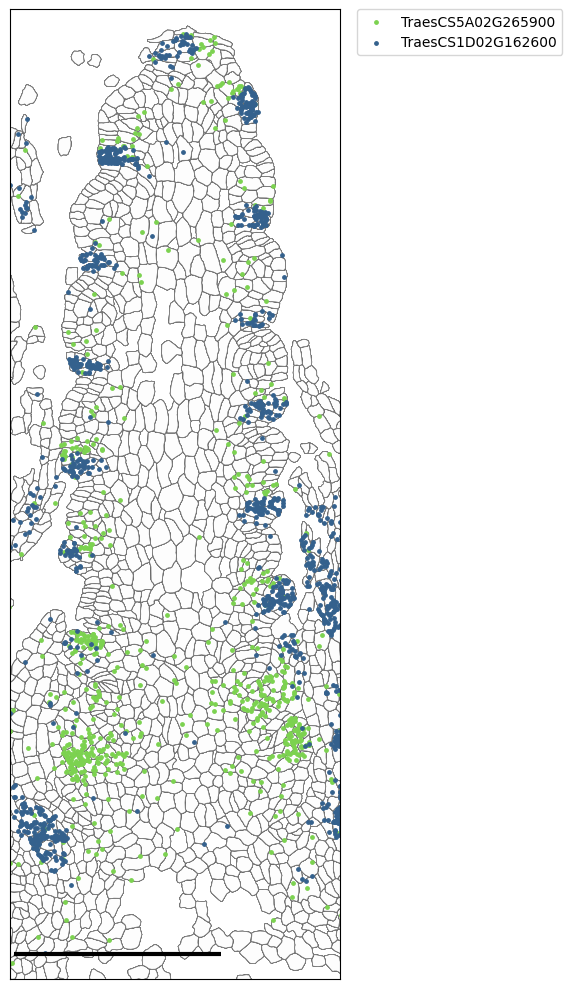

In [35]:

# Define rotation parameters
angle = -22  # Degrees
radians = math.radians(angle)
cos_angle = math.cos(radians)
sin_angle = math.sin(radians)
rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])

# Calculate the center of the segmentation data for rotation
segmentation_center_x = merged_df['Geometry'].centroid.x.mean()
segmentation_center_y = merged_df['Geometry'].centroid.y.mean()

rotated_patches_list = []
for _, row in filtered_merged_df.iterrows():
    shape = row['Geometry']
    cluster = str(row['clusters'])  # Ensure clusters are strings to match the keys in the color dictionary

    # Set face and edge colors for included clusters
    face_color = '#FDFDFD'  # Default fill color for included clusters
    edge_color = 'dimgrey'  # Default edge color

    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            centered_coords = np.array(poly.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        centered_coords = np.array(shape.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
        rotated_patches_list.append(patch)

# Step 2: Rotate transcript coordinates without filtering by polygon containment
rotated_transcript_data = {}
for gene, color in genes_of_interest.items():
    transcripts_of_interest = filtered_transcripts_df2[filtered_transcripts_df2['gene'] == gene].copy()
    transcript_coords = transcripts_of_interest[['global_x', 'global_y']].to_numpy()

    # Rotate coordinates
    centered_transcript_coords = transcript_coords - np.array([segmentation_center_x, segmentation_center_y])
    rotated_transcript_coords = np.dot(centered_transcript_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])

    # Store rotated coordinates and color for plotting
    rotated_transcript_data[gene] = {
        'x': rotated_transcript_coords[:, 0],
        'y': rotated_transcript_coords[:, 1],
        'color': color
    }

# Plot the rotated segmentation and transcripts
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated segmentation polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Plot each gene's rotated transcripts with unique colors
for gene, data in rotated_transcript_data.items():
    ax.scatter(data['x'], data['y'], color=data['color'], s=6, alpha=1, label=gene)


# Set axis limits
ax.set_ylim(6650, 7825)
ax.set_xlim(3750, 4150)
ax.set_aspect('equal')

# Add a 25-micron scale bar
scale_bar_length = 250  # Microns
x_start = 3755  # Starting x-coordinate of the scale bar
y_start = 6680  # Starting y-coordinate of the scale bar
x_end = x_start + scale_bar_length  # Ending x-coordinate of the scale bar


# Place the legend outside the plot
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0)

# Draw the scale bar line
ax.hlines(y_start, x_start, x_end, colors='black', linewidth=3)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_SPL17_YABBY1_Scalebar250.png', dpi=700, bbox_inches='tight', format='png')
plt.show()



## now mapping by cell groups 

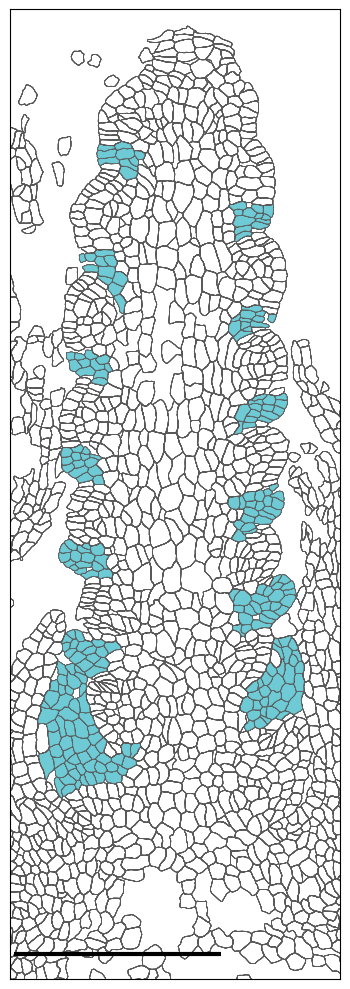

In [36]:
# Use the index of cellgroups as filtered EntityIDs
filtered_cellgroups = cellgroups[cellgroups['Custom cell groups'].str.startswith('LR')]
filtered_entities = filtered_cellgroups.index  # Assuming the index contains 'EntityID'

# Define custom colors for specific clusters
custom_cluster_colors = {
    '0': '#a70e62', 
    '12': '#6ecad5',
    '3': '#f0b932', 
    '11': '#fed2ff',
    '4': '#ffd95a'
}

# Default color for unspecified clusters
default_color = "white"

# Define rotation parameters
angle = -22  # Degrees
radians = math.radians(angle)
cos_angle = math.cos(radians)
sin_angle = math.sin(radians)
rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])

# Calculate the center of the filtered segmentation data for rotation
segmentation_center_x = merged_df['Geometry'].centroid.x.mean()
segmentation_center_y = merged_df['Geometry'].centroid.y.mean()

# Apply rotation and assign conditional colors to each Polygon
rotated_patches_list = []
for _, row in merged_df.iterrows():
    shape = row['Geometry']
    cluster = str(row['clusters'])  # Convert cluster to string to match custom colors dict keys
    entity_id = row['EntityID']  # EntityID of the current row

    # Assign colors based on whether the EntityID is in cellgroups
    if entity_id in filtered_entities:
        face_color = custom_cluster_colors.get(cluster, default_color)  # Use domain colors
        edge_color = '#595959'
    else:
        face_color = 'none'  # Transparent fill for non-cellgroup entities
        edge_color = '#595959'  # Outer cell edge color

    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            centered_coords = np.array(poly.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            rotated_poly = Polygon(rotated_coords)
            patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        centered_coords = np.array(shape.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        rotated_poly = Polygon(rotated_coords)
        patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
        rotated_patches_list.append(patch)

# Plot the rotated and colored polygons
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Calculate axis limits
rotated_x_coords = [coord[0] for patch in rotated_patches_list for coord in patch.get_xy()]
rotated_y_coords = [coord[1] for patch in rotated_patches_list for coord in patch.get_xy()]
x_min, x_max = min(rotated_x_coords), max(rotated_x_coords)
y_min, y_max = min(rotated_y_coords), max(rotated_y_coords)

# Set axis limits
ax.set_ylim(6650, 7825)
ax.set_xlim(3750, 4150)
ax.set_aspect('equal')

# Add a 25-micron scale bar
scale_bar_length = 250  # Microns
x_start = 3755  # Starting x-coordinate of the scale bar
y_start = 6680  # Starting y-coordinate of the scale bar
x_end = x_start + scale_bar_length  # Ending x-coordinate of the scale bar

# Draw the scale bar line
ax.hlines(y_start, x_start, x_end, colors='black', linewidth=3)


ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])


plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_leafridgegroups_Scalebar250.png', dpi=700, bbox_inches='tight', format='png')
plt.show()


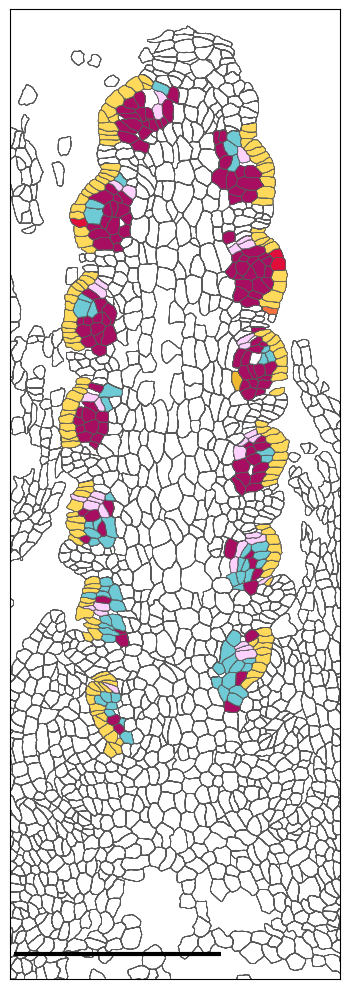

In [37]:
# Use the index of cellgroups as filtered EntityIDs
filtered_cellgroups = cellgroups[cellgroups['Custom cell groups'].str.startswith('SR')]
filtered_entities = filtered_cellgroups.index  # Assuming the index contains 'EntityID'

# Define custom colors for specific clusters
custom_cluster_colors = {
    '0': '#a70e62', 
    '12': '#6ecad5',
    '3': '#f0b932', 
    '11': '#fed2ff',
    '4': '#ffd95a',
    '1' : '#e10e3c',
    '2' : '#f47140'
}

# Default color for unspecified clusters
default_color = "white"

# Define rotation parameters
angle = -22  # Degrees
radians = math.radians(angle)
cos_angle = math.cos(radians)
sin_angle = math.sin(radians)
rotation_matrix = np.array([[cos_angle, -sin_angle], [sin_angle, cos_angle]])

# Calculate the center of the filtered segmentation data for rotation
segmentation_center_x = merged_df['Geometry'].centroid.x.mean()
segmentation_center_y = merged_df['Geometry'].centroid.y.mean()

# Apply rotation and assign conditional colors to each Polygon
rotated_patches_list = []
for _, row in merged_df.iterrows():
    shape = row['Geometry']
    cluster = str(row['clusters'])  # Convert cluster to string to match custom colors dict keys
    entity_id = row['EntityID']  # EntityID of the current row

    # Assign colors based on whether the EntityID is in cellgroups
    if entity_id in filtered_entities:
        face_color = custom_cluster_colors.get(cluster, default_color)  # Use domain colors
        edge_color = '#595959'
    else:
        face_color = 'none'  # Transparent fill for non-cellgroup entities
        edge_color = '#595959'  # Outer cell edge color

    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            centered_coords = np.array(poly.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            rotated_poly = Polygon(rotated_coords)
            patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        centered_coords = np.array(shape.exterior.coords) - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        rotated_poly = Polygon(rotated_coords)
        patch = patches.Polygon(rotated_coords, closed=True, facecolor=face_color, edgecolor=edge_color, linewidth=0.5)
        rotated_patches_list.append(patch)

# Plot the rotated and colored polygons
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Calculate axis limits
rotated_x_coords = [coord[0] for patch in rotated_patches_list for coord in patch.get_xy()]
rotated_y_coords = [coord[1] for patch in rotated_patches_list for coord in patch.get_xy()]
x_min, x_max = min(rotated_x_coords), max(rotated_x_coords)
y_min, y_max = min(rotated_y_coords), max(rotated_y_coords)

# Set axis limits
ax.set_ylim(6650, 7825)
ax.set_xlim(3750, 4150)
ax.set_aspect('equal')

# Add a 25-micron scale bar
scale_bar_length = 250  # Microns
x_start = 3755  # Starting x-coordinate of the scale bar
y_start = 6680  # Starting y-coordinate of the scale bar
x_end = x_start + scale_bar_length  # Ending x-coordinate of the scale bar

# Draw the scale bar line
ax.hlines(y_start, x_start, x_end, colors='black', linewidth=3)


ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_spikeletridgegroups_Scalebar250.png', dpi=700, bbox_inches='tight', format='png')
plt.tight_layout()
plt.show()


# Creating composite maps 

I will perform the same steps on four spikelet ridges: 8 - 11
I will rotate them to the same orientation, and summate transcript counts within a 25x25 grid 

### SR8

In [38]:
# 1. Select SR8 cells only
sr8_group = cellgroups[cellgroups['Custom cell groups'] == 'SR8']
sr8_list = sr8_group.index.astype(str).tolist() 

# 2. Filter the segmentation data for SR8
segmentation_df['EntityID'] = segmentation_df['EntityID'].astype(str)  # Ensure EntityID is string
filtered_segmentation_df = segmentation_df[segmentation_df['EntityID'].isin(sr8_list)]

In [39]:
# 3. Create patches for visualization and calculate the bounding box
filtered_patches_list = []
all_coords = []  # Store all coordinates for bounding box calculation

for _, row in filtered_segmentation_df.iterrows():
    shape = row['Geometry']
    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            coords = list(poly.exterior.coords)
            all_coords.extend(coords)
            patch = patches.Polygon(coords, closed=True, facecolor="gray", edgecolor='white', linewidth=0.25)
            filtered_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        coords = list(shape.exterior.coords)
        all_coords.extend(coords)
        patch = patches.Polygon(coords, closed=True, facecolor="gray", edgecolor='white', linewidth=0.25)
        filtered_patches_list.append(patch)

# Calculate bounding box from all coordinates
all_coords = np.array(all_coords)
x_min, x_max = all_coords[:, 0].min(), all_coords[:, 0].max()
y_min, y_max = all_coords[:, 1].min(), all_coords[:, 1].max()

# 4. Filter transcript data within the bounding box
transcripts_in_area = transcripts_df[
    (transcripts_df['global_x'] >= x_min) & (transcripts_df['global_x'] <= x_max) &
    (transcripts_df['global_y'] >= y_min) & (transcripts_df['global_y'] <= y_max)
]


In [40]:
# Define genes and their colors
genes_of_interest = {
    'TraesCS4A02G256700': '#C51D71', #knox
    'TraesCS7D02G246100': '#F57BEC', #cuc3
    'TraesCS4A02G123800': '#3197F9', #AIL6
    'TraesCS4A02G016000': '#FF8700'#ILI3
}

# Define rotation parameters
angle = 159  # Degrees
radians = math.radians(angle)
rotation_matrix = np.array([[math.cos(radians), -math.sin(radians)], [math.sin(radians), math.cos(radians)]])

# Calculate the center of the filtered segmentation data for rotation
segmentation_center_x = filtered_segmentation_df['Geometry'].centroid.x.mean()
segmentation_center_y = filtered_segmentation_df['Geometry'].centroid.y.mean()

# Rotate and mirror segmentation polygons for visualization and filtering
rotated_patches_list = []
rotated_polygons = []
for _, row in filtered_segmentation_df.iterrows():
    shape = row['Geometry']
    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            coords = poly.exterior.coords
            centered_coords = coords - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            mirrored_coords = rotated_coords * np.array([1, -1])
            rotated_poly = Polygon(mirrored_coords)
            rotated_polygons.append(rotated_poly)
            patch = patches.Polygon(mirrored_coords, closed=True, facecolor="#F3F3F3", edgecolor='dimgrey', linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        coords = shape.exterior.coords
        centered_coords = coords - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        mirrored_coords = rotated_coords * np.array([1, -1])
        rotated_poly = Polygon(mirrored_coords)
        rotated_polygons.append(rotated_poly)
        patch = patches.Polygon(mirrored_coords, closed=True, facecolor="#F3F3F3", edgecolor='dimgrey', linewidth=0.25)
        rotated_patches_list.append(patch)

# Apply rotation to transcript coordinates
rotated_transcript_data = {}
for gene, color in genes_of_interest.items():
    transcripts_of_interest = transcripts_in_area[transcripts_in_area['gene'] == gene].copy()
    coords = transcripts_of_interest[['global_x', 'global_y']].to_numpy()
    centered_coords = coords - np.array([segmentation_center_x, segmentation_center_y])
    rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
    mirrored_coords = rotated_coords * np.array([1, -1])

    # Filter transcripts within rotated polygons
    filtered_x, filtered_y = [], []
    for x, y in mirrored_coords:
        point = Point(x, y)
        if any(poly.contains(point) for poly in rotated_polygons):
            filtered_x.append(x)
            filtered_y.append(y)

    rotated_transcript_data[gene] = {'x': filtered_x, 'y': filtered_y, 'color': color}

# Calculate grid bins and extents
mirrored_x_coords = [coord[0] for patch in rotated_patches_list for coord in patch.get_xy()]
mirrored_y_coords = [coord[1] for patch in rotated_patches_list for coord in patch.get_xy()]
x_min, x_max = min(mirrored_x_coords), max(mirrored_x_coords)
y_min, y_max = min(mirrored_y_coords), max(mirrored_y_coords)

num_bins = 25
x_bins = np.linspace(x_min, x_max, num_bins + 1)
y_bins = np.linspace(y_min, y_max, num_bins + 1)

# Calculate frequency data for heatmaps
frequency_data = {gene: np.zeros((num_bins, num_bins)) for gene in genes_of_interest.keys()}
for gene, data in rotated_transcript_data.items():
    for x, y in zip(data['x'], data['y']):
        x_idx = np.digitize(x, x_bins) - 1
        y_idx = np.digitize(y, y_bins) - 1
        if 0 <= x_idx < num_bins and 0 <= y_idx < num_bins:
            frequency_data[gene][y_idx, x_idx] += 1


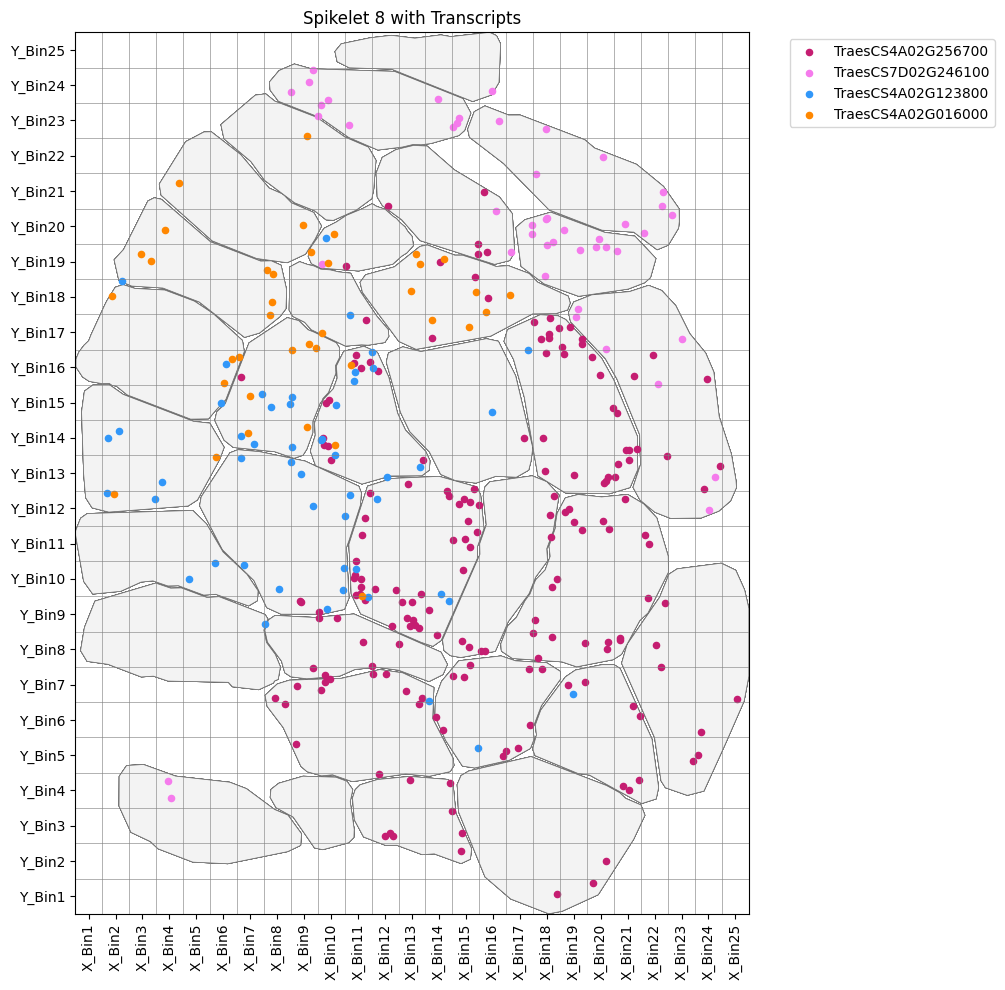

In [41]:
# Plot rotated polygons and transcript points
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Plot transcript points
for gene, data in rotated_transcript_data.items():
    ax.scatter(data['x'], data['y'], color=data['color'], s=20, alpha=1, label=gene)

# Add grid lines
for x_bin in x_bins:
    ax.axvline(x=x_bin, color='gray', linewidth=0.5, alpha=0.85)
for y_bin in y_bins:
    ax.axhline(y=y_bin, color='gray', linewidth=0.5, alpha=0.85)

# Set axis properties
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_aspect('equal')
ax.set_xticks(x_bins[:-1] + np.diff(x_bins) / 2)
ax.set_xticklabels([f"X_Bin{i+1}" for i in range(num_bins)], rotation=90)
ax.set_yticks(y_bins[:-1] + np.diff(y_bins) / 2)
ax.set_yticklabels([f"Y_Bin{i+1}" for i in range(num_bins)])

# Add title and legend
ax.set_title("Spikelet 8 with Transcripts")
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_spikelet8_bin25.png', dpi=700, bbox_inches='tight', format='png')
plt.show()


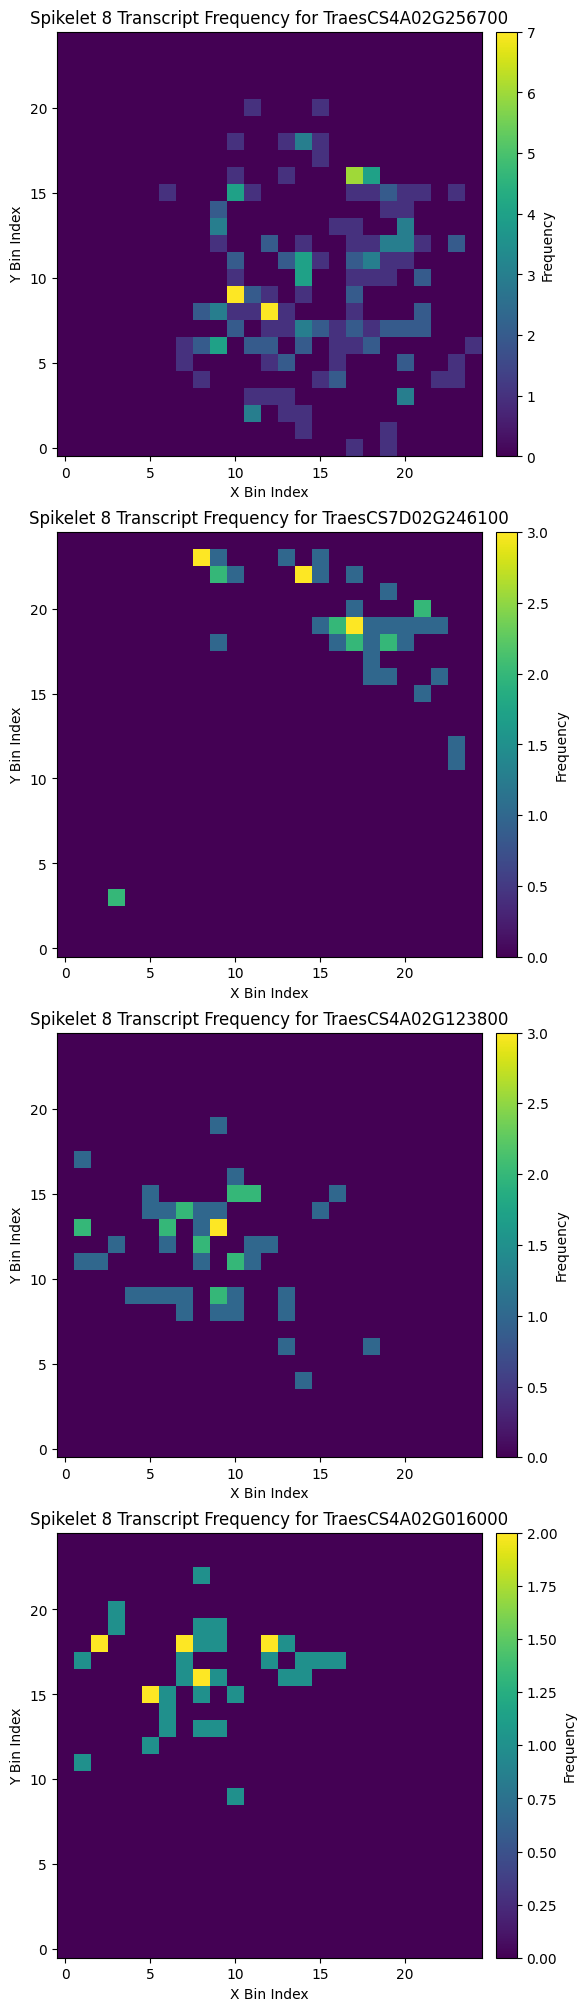

In [42]:
# Plot heatmaps for each gene
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 20), constrained_layout=True)

for ax, (gene, freq_matrix) in zip(axes, frequency_data.items()):
    im = ax.imshow(freq_matrix, cmap='viridis', origin='lower')
    ax.set_title(f"Spikelet 8 Transcript Frequency for {gene}", fontsize=12)
    ax.set_xlabel("X Bin Index")
    ax.set_ylabel("Y Bin Index")
    fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02).set_label("Frequency")
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_spikelet8_bin25_heatmaps.png', dpi=700, bbox_inches='tight', format='png')
plt.show()


In [43]:
#saving the grid data later for concatenation 
frequency_data_spikelet8 = frequency_data.copy()

### SR10 

In [44]:
# 1. Select SR10 cells only (and remove a few that stick out and make alignment not possible
sr10_group = cellgroups[cellgroups['Custom cell groups'] == 'SR10']
remove_list = ['2343479300072100056', '2343479300072100054', '2343479300059100115']  # list of strings to remove
sr10_list = sr10_group.index.astype(str).tolist() 
sr10_list = [item for item in sr10_list if item not in remove_list]

# 2. Filter the segmentation data for SR10
segmentation_df['EntityID'] = segmentation_df['EntityID'].astype(str)  # Ensure EntityID is string
filtered_segmentation_df = segmentation_df[segmentation_df['EntityID'].isin(sr10_list)]

In [45]:
# 3. Create patches for visualization and calculate the bounding box
filtered_patches_list = []
all_coords = []  # Store all coordinates for bounding box calculation

for _, row in filtered_segmentation_df.iterrows():
    shape = row['Geometry']
    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            coords = list(poly.exterior.coords)
            all_coords.extend(coords)
            patch = patches.Polygon(coords, closed=True, facecolor="gray", edgecolor='white', linewidth=0.25)
            filtered_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        coords = list(shape.exterior.coords)
        all_coords.extend(coords)
        patch = patches.Polygon(coords, closed=True, facecolor="gray", edgecolor='white', linewidth=0.25)
        filtered_patches_list.append(patch)

# Calculate bounding box from all coordinates
all_coords = np.array(all_coords)
x_min, x_max = all_coords[:, 0].min(), all_coords[:, 0].max()
y_min, y_max = all_coords[:, 1].min(), all_coords[:, 1].max()

# 4. Filter transcript data within the bounding box
transcripts_in_area = transcripts_df[
    (transcripts_df['global_x'] >= x_min) & (transcripts_df['global_x'] <= x_max) &
    (transcripts_df['global_y'] >= y_min) & (transcripts_df['global_y'] <= y_max)
]


In [46]:
# Define genes and their colors
genes_of_interest = {
    'TraesCS4A02G256700': '#C51D71', #knox
    'TraesCS7D02G246100': '#F57BEC', #cuc3
    'TraesCS4A02G123800': '#3197F9', #AIL6
    'TraesCS4A02G016000': '#FF8700'#ILI3
}

# Define rotation parameters
angle = 159  # Degrees
radians = math.radians(angle)
rotation_matrix = np.array([[math.cos(radians), -math.sin(radians)], [math.sin(radians), math.cos(radians)]])

# Calculate the center of the filtered segmentation data for rotation
segmentation_center_x = filtered_segmentation_df['Geometry'].centroid.x.mean()
segmentation_center_y = filtered_segmentation_df['Geometry'].centroid.y.mean()

# Rotate and mirror segmentation polygons for visualization and filtering
rotated_patches_list = []
rotated_polygons = []
for _, row in filtered_segmentation_df.iterrows():
    shape = row['Geometry']
    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            coords = poly.exterior.coords
            centered_coords = coords - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            mirrored_coords = rotated_coords * np.array([1, -1])
            rotated_poly = Polygon(mirrored_coords)
            rotated_polygons.append(rotated_poly)
            patch = patches.Polygon(mirrored_coords, closed=True, facecolor="#F3F3F3", edgecolor='dimgrey', linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        coords = shape.exterior.coords
        centered_coords = coords - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        mirrored_coords = rotated_coords * np.array([1, -1])
        rotated_poly = Polygon(mirrored_coords)
        rotated_polygons.append(rotated_poly)
        patch = patches.Polygon(mirrored_coords, closed=True, facecolor="#F3F3F3", edgecolor='dimgrey', linewidth=0.25)
        rotated_patches_list.append(patch)

# Apply rotation to transcript coordinates
rotated_transcript_data = {}
for gene, color in genes_of_interest.items():
    transcripts_of_interest = transcripts_in_area[transcripts_in_area['gene'] == gene].copy()
    coords = transcripts_of_interest[['global_x', 'global_y']].to_numpy()
    centered_coords = coords - np.array([segmentation_center_x, segmentation_center_y])
    rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
    mirrored_coords = rotated_coords * np.array([1, -1])

    # Filter transcripts within rotated polygons
    filtered_x, filtered_y = [], []
    for x, y in mirrored_coords:
        point = Point(x, y)
        if any(poly.contains(point) for poly in rotated_polygons):
            filtered_x.append(x)
            filtered_y.append(y)

    rotated_transcript_data[gene] = {'x': filtered_x, 'y': filtered_y, 'color': color}

# Calculate grid bins and extents
mirrored_x_coords = [coord[0] for patch in rotated_patches_list for coord in patch.get_xy()]
mirrored_y_coords = [coord[1] for patch in rotated_patches_list for coord in patch.get_xy()]
x_min, x_max = min(mirrored_x_coords), max(mirrored_x_coords)
y_min, y_max = min(mirrored_y_coords), max(mirrored_y_coords)

num_bins = 25
x_bins = np.linspace(x_min, x_max, num_bins + 1)
y_bins = np.linspace(y_min, y_max, num_bins + 1)

# Calculate frequency data for heatmaps
frequency_data = {gene: np.zeros((num_bins, num_bins)) for gene in genes_of_interest.keys()}
for gene, data in rotated_transcript_data.items():
    for x, y in zip(data['x'], data['y']):
        x_idx = np.digitize(x, x_bins) - 1
        y_idx = np.digitize(y, y_bins) - 1
        if 0 <= x_idx < num_bins and 0 <= y_idx < num_bins:
            frequency_data[gene][y_idx, x_idx] += 1


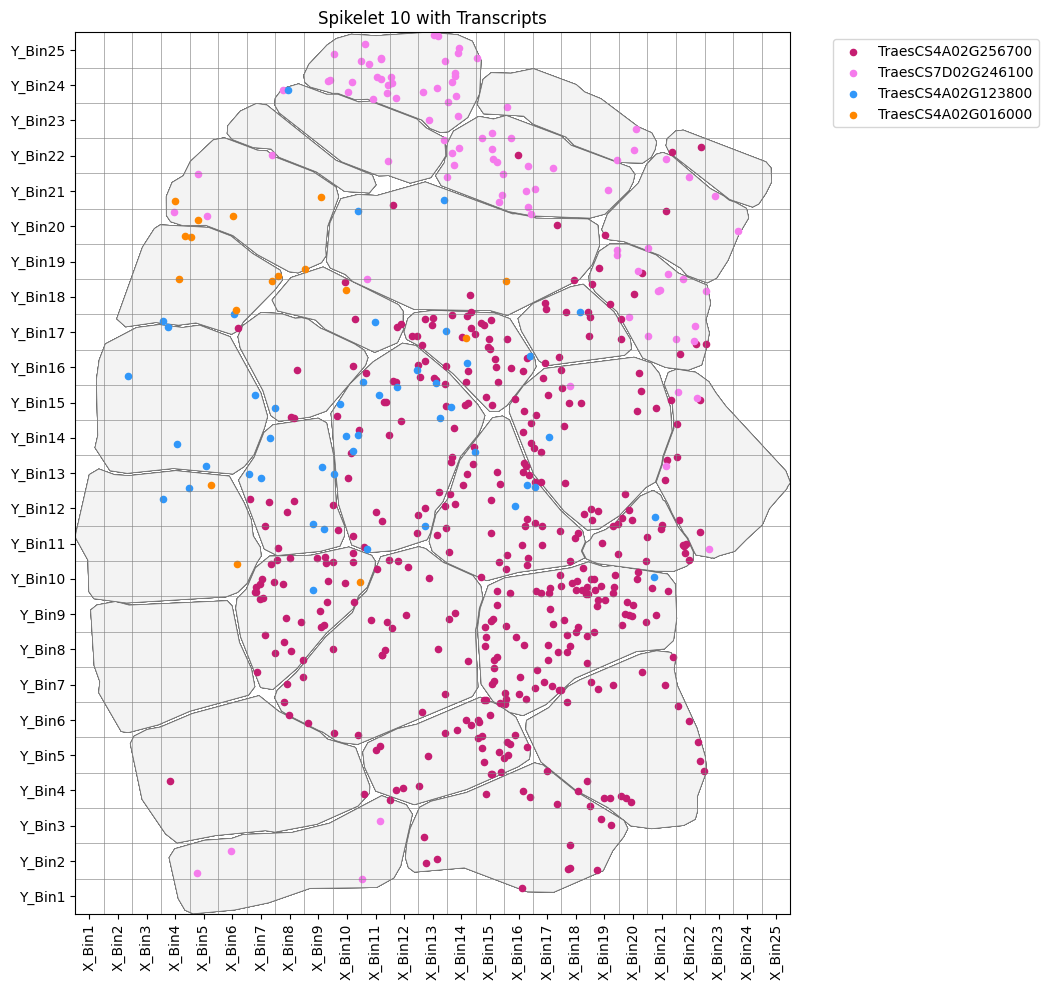

In [47]:
# Plot rotated polygons and transcript points
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Plot transcript points
for gene, data in rotated_transcript_data.items():
    ax.scatter(data['x'], data['y'], color=data['color'], s=20, alpha=1, label=gene)

# Add grid lines
for x_bin in x_bins:
    ax.axvline(x=x_bin, color='gray', linewidth=0.5, alpha=0.85)
for y_bin in y_bins:
    ax.axhline(y=y_bin, color='gray', linewidth=0.5, alpha=0.85)

# Set axis properties
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_aspect('equal')
ax.set_xticks(x_bins[:-1] + np.diff(x_bins) / 2)
ax.set_xticklabels([f"X_Bin{i+1}" for i in range(num_bins)], rotation=90)
ax.set_yticks(y_bins[:-1] + np.diff(y_bins) / 2)
ax.set_yticklabels([f"Y_Bin{i+1}" for i in range(num_bins)])

# Add title and legend
ax.set_title("Spikelet 10 with Transcripts")
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_spikelet10_bin25.png', dpi=700, bbox_inches='tight', format='png', transparent=True)
plt.show()


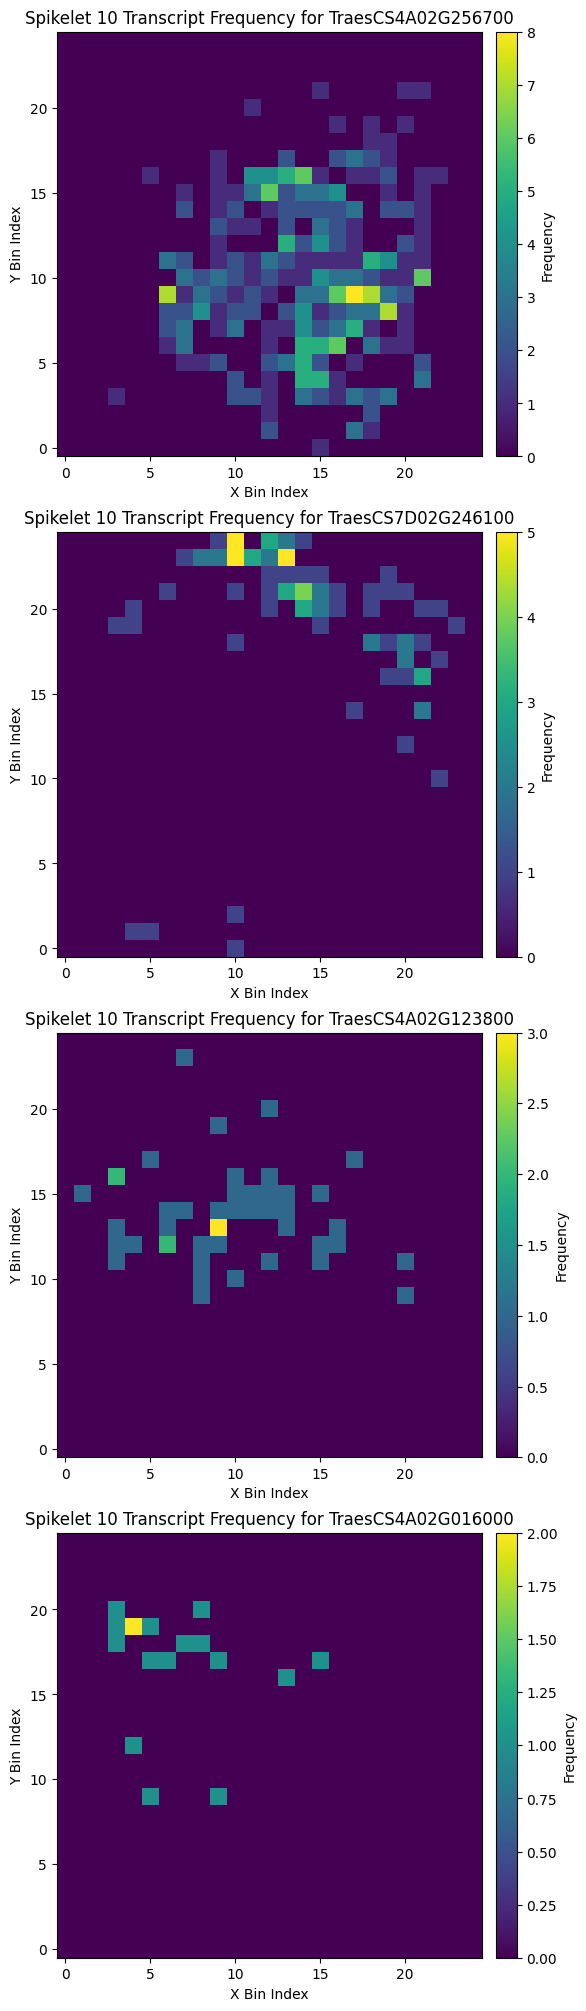

In [48]:
# Plot heatmaps for each gene
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 20), constrained_layout=True)

for ax, (gene, freq_matrix) in zip(axes, frequency_data.items()):
    im = ax.imshow(freq_matrix, cmap='viridis', origin='lower')
    ax.set_title(f"Spikelet 10 Transcript Frequency for {gene}", fontsize=12)
    ax.set_xlabel("X Bin Index")
    ax.set_ylabel("Y Bin Index")
    fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02).set_label("Frequency")
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_spikelet10_bin25_heatmaps.png', dpi=700, bbox_inches='tight', format='png')
plt.show()


In [49]:
frequency_data_spikelet10 = frequency_data.copy()

### SR9 

Note: SR9 and SR11 need to be y-mirrored to align the same as SR9 and SR11

In [50]:
# 1. Select SR9 cells only
sr9_group = cellgroups[cellgroups['Custom cell groups'] == 'SR9']
sr9_list = sr9_group.index.astype(str).tolist() 

# 2. Filter the segmentation data for SR9
segmentation_df['EntityID'] = segmentation_df['EntityID'].astype(str)  # Ensure EntityID is string
filtered_segmentation_df = segmentation_df[segmentation_df['EntityID'].isin(sr9_list)]

In [51]:
# Define genes and their colors
genes_of_interest = {
    'TraesCS4A02G256700': '#C51D71', #knox
    'TraesCS7D02G246100': '#F57BEC', #cuc3
    'TraesCS4A02G123800': '#3197F9', #AIL6
    'TraesCS4A02G016000': '#FF8700'#ILI3
}


# 3. Create patches for visualization and calculate the bounding box
filtered_patches_list = []
all_coords = []  # Store all coordinates for bounding box calculation

# Add each filtered cell's polygon to the plot
for _, row in filtered_segmentation_df.iterrows():
    shape = row['Geometry']
    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            patch = patches.Polygon(list(poly.exterior.coords), closed=True, facecolor="gray", edgecolor='white', linewidth=0.25)
            filtered_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        patch = patches.Polygon(list(shape.exterior.coords), closed=True, facecolor="gray", edgecolor='white', linewidth=0.25)
        filtered_patches_list.append(patch)


# Calculate bounding box for the filtered segmentation cells
filtered_x_coords = [coord[0] for patch in filtered_patches_list for coord in patch.get_xy()]
filtered_y_coords = [coord[1] for patch in filtered_patches_list for coord in patch.get_xy()]
x_min, x_max = min(filtered_x_coords), max(filtered_x_coords)
y_min, y_max = min(filtered_y_coords), max(filtered_y_coords)


# Plot the transcripts on top (make sure the filtered transcript coordinates are within this area)
transcripts_in_area = transcripts_df[
    (transcripts_df['global_x'] >= x_min) & (transcripts_df['global_x'] <= x_max) &
    (transcripts_df['global_y'] >= y_min) & (transcripts_df['global_y'] <= y_max)
]

# Define rotation parameters
angle = 159  # Degrees
radians = np.radians(angle)
rotation_matrix = np.array([[np.cos(radians), -np.sin(radians)], [np.sin(radians), np.cos(radians)]])

# Calculate the center of the filtered segmentation data for rotation
segmentation_center_x = filtered_segmentation_df['Geometry'].centroid.x.mean()
segmentation_center_y = filtered_segmentation_df['Geometry'].centroid.y.mean()

# Apply rotation and y-mirroring to each Polygon in the filtered segmentation data
rotated_patches_list = []
rotated_polygons = []  # Store rotated polygons for containment checks
for _, row in filtered_segmentation_df.iterrows():
    shape = row['Geometry']
    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            centered_coords = poly.exterior.coords - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            mirrored_coords = rotated_coords * np.array([1, -1])  # Mirror only the y-axis
            rotated_poly = Polygon(mirrored_coords)
            rotated_polygons.append(rotated_poly)
            patch = patches.Polygon(mirrored_coords, closed=True, facecolor="#F3F3F3", edgecolor='dimgrey', linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        centered_coords = shape.exterior.coords - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        mirrored_coords = rotated_coords * np.array([1, -1])  # Mirror only the y-axis
        rotated_poly = Polygon(mirrored_coords)
        rotated_polygons.append(rotated_poly)
        patch = patches.Polygon(mirrored_coords, closed=True, facecolor="#F3F3F3", edgecolor='dimgrey', linewidth=0.5)
        rotated_patches_list.append(patch)

# Apply rotation and y-mirroring to transcript coordinates and filter by polygons
rotated_transcript_data = {}
for gene, color in genes_of_interest.items():
    transcripts_of_interest = transcripts_in_area[transcripts_in_area['gene'] == gene].copy()
    transcript_coords = transcripts_of_interest[['global_x', 'global_y']].to_numpy()
    centered_transcript_coords = transcript_coords - np.array([segmentation_center_x, segmentation_center_y])
    rotated_transcript_coords = np.dot(centered_transcript_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
    mirrored_transcript_coords = rotated_transcript_coords * np.array([1, -1])  # Mirror only the y-axis
    
    # Filter transcripts that are within any of the rotated polygons
    filtered_x, filtered_y = [], []
    for x, y in mirrored_transcript_coords:
        point = Point(x, y)
        if any(poly.contains(point) for poly in rotated_polygons):  # Only add if within a polygon
            filtered_x.append(x)
            filtered_y.append(y)
    
    # Add filtered coordinates to the data dictionary for plotting
    rotated_transcript_data[gene] = {
        'x': filtered_x,
        'y': filtered_y,
        'color': color
    }


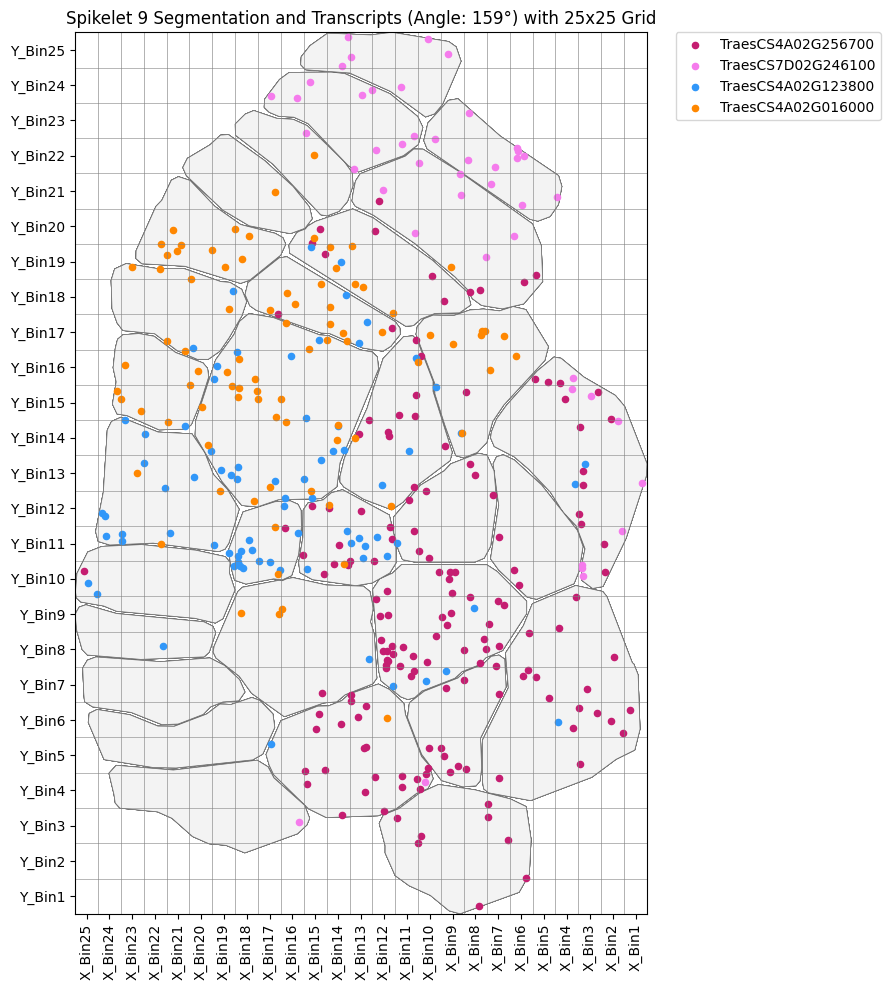

In [52]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated and y-mirrored segmentation polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Plot each gene's filtered transcripts with unique colors
for gene, data in rotated_transcript_data.items():
    ax.scatter(data['x'], data['y'], color=data['color'],  s=20, alpha=1, label=gene)

# Calculate the axis limits based on the mirrored coordinates
mirrored_x_coords = [coord[0] for patch in rotated_patches_list for coord in patch.get_xy()]
mirrored_y_coords = [coord[1] for patch in rotated_patches_list for coord in patch.get_xy()]
x_min, x_max = min(mirrored_x_coords), max(mirrored_x_coords)
y_min, y_max = min(mirrored_y_coords), max(mirrored_y_coords)

# Define 25 bins along each axis
num_bins = 25
x_bins = np.linspace(x_min, x_max, num_bins + 1)
y_bins = np.linspace(y_min, y_max, num_bins + 1)

# Draw grid lines on the plot
for x_bin in x_bins:
    ax.axvline(x=x_bin, color='gray', linewidth=0.5, alpha=0.85, zorder=1)
for y_bin in y_bins:
    ax.axhline(y=y_bin, color='gray', linewidth=0.5, alpha=0.8, zorder=1)

# Set axis limits to fit the grid perfectly, but reverse x-axis for a horizontal flip
ax.set_xlim([x_max, x_min])  # Flip x-axis by reversing min and max
ax.set_ylim([y_min, y_max])
ax.set_aspect('equal')


ax.set_xticks(x_bins[:-1] + np.diff(x_bins) / 2)
ax.set_xticklabels([f"X_Bin{i+1}" for i in range(num_bins)], rotation=90)
ax.set_yticks(y_bins[:-1] + np.diff(y_bins) / 2)
ax.set_yticklabels([f"Y_Bin{i+1}" for i in range(num_bins)])


# Add title
ax.set_title(f"Spikelet 9 Segmentation and Transcripts (Angle: {angle}°) with 25x25 Grid")

# Place the legend outside the plot
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0)

plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_spikelet9_bin25.png', dpi=700, bbox_inches='tight', format='png')
plt.show()

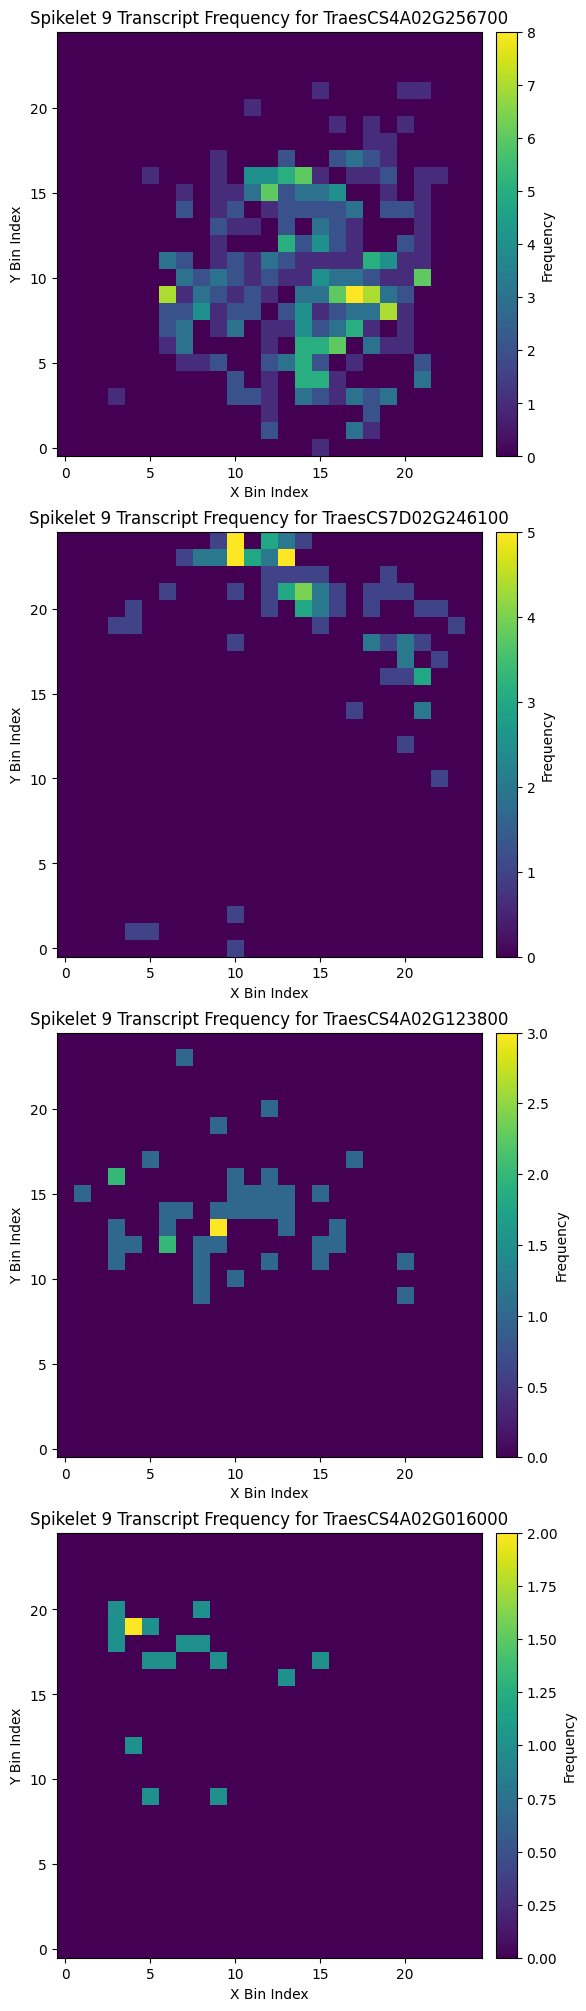

In [53]:
# Plot heatmaps for each gene
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 20), constrained_layout=True)

for ax, (gene, freq_matrix) in zip(axes, frequency_data.items()):
    im = ax.imshow(freq_matrix, cmap='viridis', origin='lower')
    ax.set_title(f"Spikelet 9 Transcript Frequency for {gene}", fontsize=12)
    ax.set_xlabel("X Bin Index")
    ax.set_ylabel("Y Bin Index")
    fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02).set_label("Frequency")
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_spikelet9_bin25_heatmaps.png', dpi=700, bbox_inches='tight', format='png')
plt.show()

In [54]:
frequency_data_spikelet9 = frequency_data.copy()

### SR11

In [55]:
# 1. Select SR11 cells only
sr11_group = cellgroups[cellgroups['Custom cell groups'] == 'SR11']
sr11_list = sr11_group.index.astype(str).tolist() 
remove_list = ['2343479300071100346']
sr11_list = [item for item in sr11_list if item not in remove_list]

# 2. Filter the segmentation data for SR9
segmentation_df['EntityID'] = segmentation_df['EntityID'].astype(str)  # Ensure EntityID is string
filtered_segmentation_df = segmentation_df[segmentation_df['EntityID'].isin(sr11_list)]

In [56]:
# Define genes and their colors
genes_of_interest = {
    'TraesCS4A02G256700': '#C51D71', #knox
    'TraesCS7D02G246100': '#F57BEC', #cuc3
    'TraesCS4A02G123800': '#3197F9', #AIL6
    'TraesCS4A02G016000': '#FF8700'#ILI3
}


# 3. Create patches for visualization and calculate the bounding box
filtered_patches_list = []
all_coords = []  # Store all coordinates for bounding box calculation

# Add each filtered cell's polygon to the plot
for _, row in filtered_segmentation_df.iterrows():
    shape = row['Geometry']
    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            patch = patches.Polygon(list(poly.exterior.coords), closed=True, facecolor="gray", edgecolor='white', linewidth=0.25)
            filtered_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        patch = patches.Polygon(list(shape.exterior.coords), closed=True, facecolor="gray", edgecolor='white', linewidth=0.25)
        filtered_patches_list.append(patch)


# Calculate bounding box for the filtered segmentation cells
filtered_x_coords = [coord[0] for patch in filtered_patches_list for coord in patch.get_xy()]
filtered_y_coords = [coord[1] for patch in filtered_patches_list for coord in patch.get_xy()]
x_min, x_max = min(filtered_x_coords), max(filtered_x_coords)
y_min, y_max = min(filtered_y_coords), max(filtered_y_coords)


# Plot the transcripts on top (make sure the filtered transcript coordinates are within this area)
transcripts_in_area = transcripts_df[
    (transcripts_df['global_x'] >= x_min) & (transcripts_df['global_x'] <= x_max) &
    (transcripts_df['global_y'] >= y_min) & (transcripts_df['global_y'] <= y_max)
]

# Define rotation parameters
angle = 155  # Degrees
radians = np.radians(angle)
rotation_matrix = np.array([[np.cos(radians), -np.sin(radians)], [np.sin(radians), np.cos(radians)]])

# Calculate the center of the filtered segmentation data for rotation
segmentation_center_x = filtered_segmentation_df['Geometry'].centroid.x.mean()
segmentation_center_y = filtered_segmentation_df['Geometry'].centroid.y.mean()

# Apply rotation and y-mirroring to each Polygon in the filtered segmentation data
rotated_patches_list = []
rotated_polygons = []  # Store rotated polygons for containment checks
for _, row in filtered_segmentation_df.iterrows():
    shape = row['Geometry']
    if isinstance(shape, MultiPolygon):
        for poly in shape.geoms:
            centered_coords = poly.exterior.coords - np.array([segmentation_center_x, segmentation_center_y])
            rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
            mirrored_coords = rotated_coords * np.array([1, -1])  # Mirror only the y-axis
            rotated_poly = Polygon(mirrored_coords)
            rotated_polygons.append(rotated_poly)
            patch = patches.Polygon(mirrored_coords, closed=True, facecolor="#F3F3F3", edgecolor='dimgrey', linewidth=0.5)
            rotated_patches_list.append(patch)
    elif isinstance(shape, Polygon):
        centered_coords = shape.exterior.coords - np.array([segmentation_center_x, segmentation_center_y])
        rotated_coords = np.dot(centered_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
        mirrored_coords = rotated_coords * np.array([1, -1])  # Mirror only the y-axis
        rotated_poly = Polygon(mirrored_coords)
        rotated_polygons.append(rotated_poly)
        patch = patches.Polygon(mirrored_coords, closed=True, facecolor="#F3F3F3", edgecolor='dimgrey', linewidth=0.5)
        rotated_patches_list.append(patch)

# Apply rotation and y-mirroring to transcript coordinates and filter by polygons
rotated_transcript_data = {}
for gene, color in genes_of_interest.items():
    transcripts_of_interest = transcripts_in_area[transcripts_in_area['gene'] == gene].copy()
    transcript_coords = transcripts_of_interest[['global_x', 'global_y']].to_numpy()
    centered_transcript_coords = transcript_coords - np.array([segmentation_center_x, segmentation_center_y])
    rotated_transcript_coords = np.dot(centered_transcript_coords, rotation_matrix) + np.array([segmentation_center_x, segmentation_center_y])
    mirrored_transcript_coords = rotated_transcript_coords * np.array([1, -1])  # Mirror only the y-axis
    
    # Filter transcripts that are within any of the rotated polygons
    filtered_x, filtered_y = [], []
    for x, y in mirrored_transcript_coords:
        point = Point(x, y)
        if any(poly.contains(point) for poly in rotated_polygons):  # Only add if within a polygon
            filtered_x.append(x)
            filtered_y.append(y)
    
    # Add filtered coordinates to the data dictionary for plotting
    rotated_transcript_data[gene] = {
        'x': filtered_x,
        'y': filtered_y,
        'color': color
    }


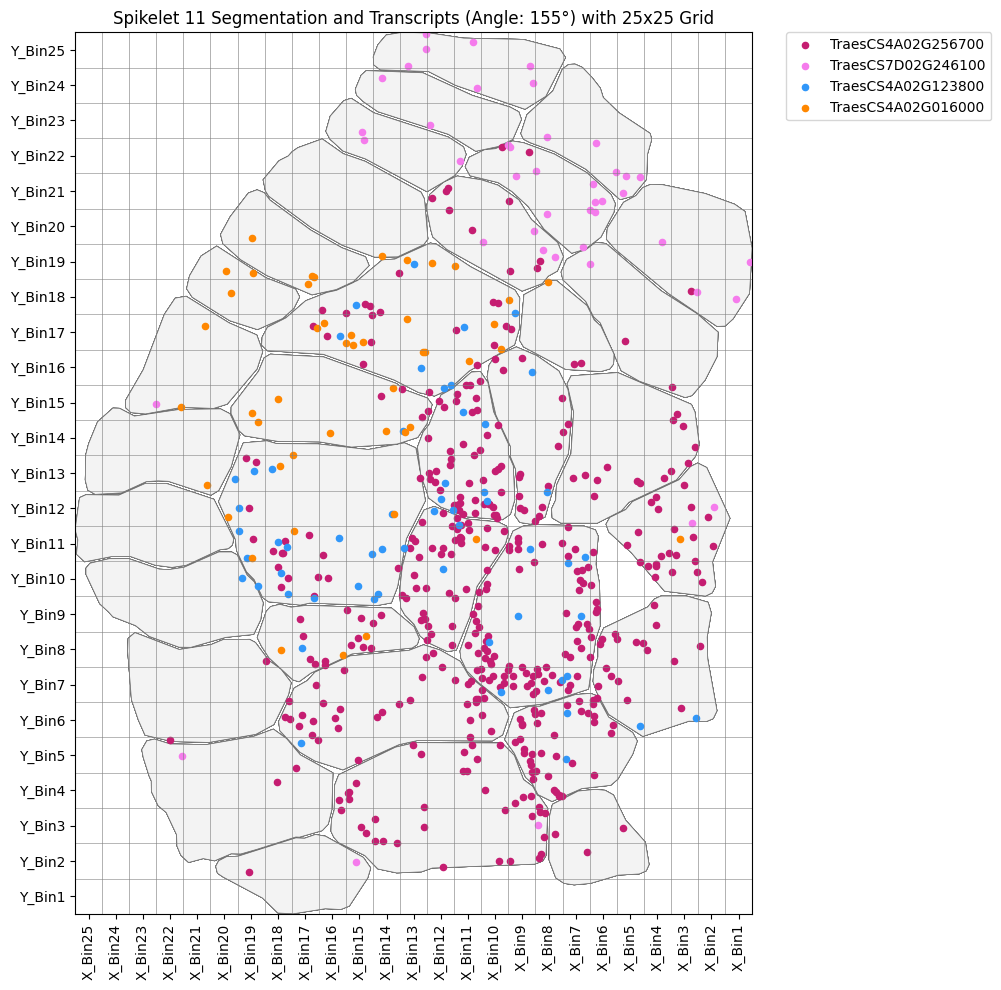

In [57]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add rotated and y-mirrored segmentation polygons
collection = PatchCollection(rotated_patches_list, match_original=True)
ax.add_collection(collection)

# Plot each gene's filtered transcripts with unique colors
for gene, data in rotated_transcript_data.items():
    ax.scatter(data['x'], data['y'], color=data['color'],  s=20, alpha=1, label=gene)

# Calculate the axis limits based on the mirrored coordinates
mirrored_x_coords = [coord[0] for patch in rotated_patches_list for coord in patch.get_xy()]
mirrored_y_coords = [coord[1] for patch in rotated_patches_list for coord in patch.get_xy()]
x_min, x_max = min(mirrored_x_coords), max(mirrored_x_coords)
y_min, y_max = min(mirrored_y_coords), max(mirrored_y_coords)

# Define 25 bins along each axis
num_bins = 25
x_bins = np.linspace(x_min, x_max, num_bins + 1)
y_bins = np.linspace(y_min, y_max, num_bins + 1)

# Draw grid lines on the plot
for x_bin in x_bins:
    ax.axvline(x=x_bin, color='gray', linewidth=0.5, alpha=0.85, zorder=1)
for y_bin in y_bins:
    ax.axhline(y=y_bin, color='gray', linewidth=0.5, alpha=0.8, zorder=1)

# Set axis limits to fit the grid perfectly, but reverse x-axis for a horizontal flip
ax.set_xlim([x_max, x_min])  # Flip x-axis by reversing min and max
ax.set_ylim([y_min, y_max])
ax.set_aspect('equal')


ax.set_xticks(x_bins[:-1] + np.diff(x_bins) / 2)
ax.set_xticklabels([f"X_Bin{i+1}" for i in range(num_bins)], rotation=90)
ax.set_yticks(y_bins[:-1] + np.diff(y_bins) / 2)
ax.set_yticklabels([f"Y_Bin{i+1}" for i in range(num_bins)])


# Add title
ax.set_title(f"Spikelet 11 Segmentation and Transcripts (Angle: {angle}°) with 25x25 Grid")

# Place the legend outside the plot
ax.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0)

plt.tight_layout()
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_spikelet11_bin25.png', dpi=700, bbox_inches='tight', format='png')
plt.show()

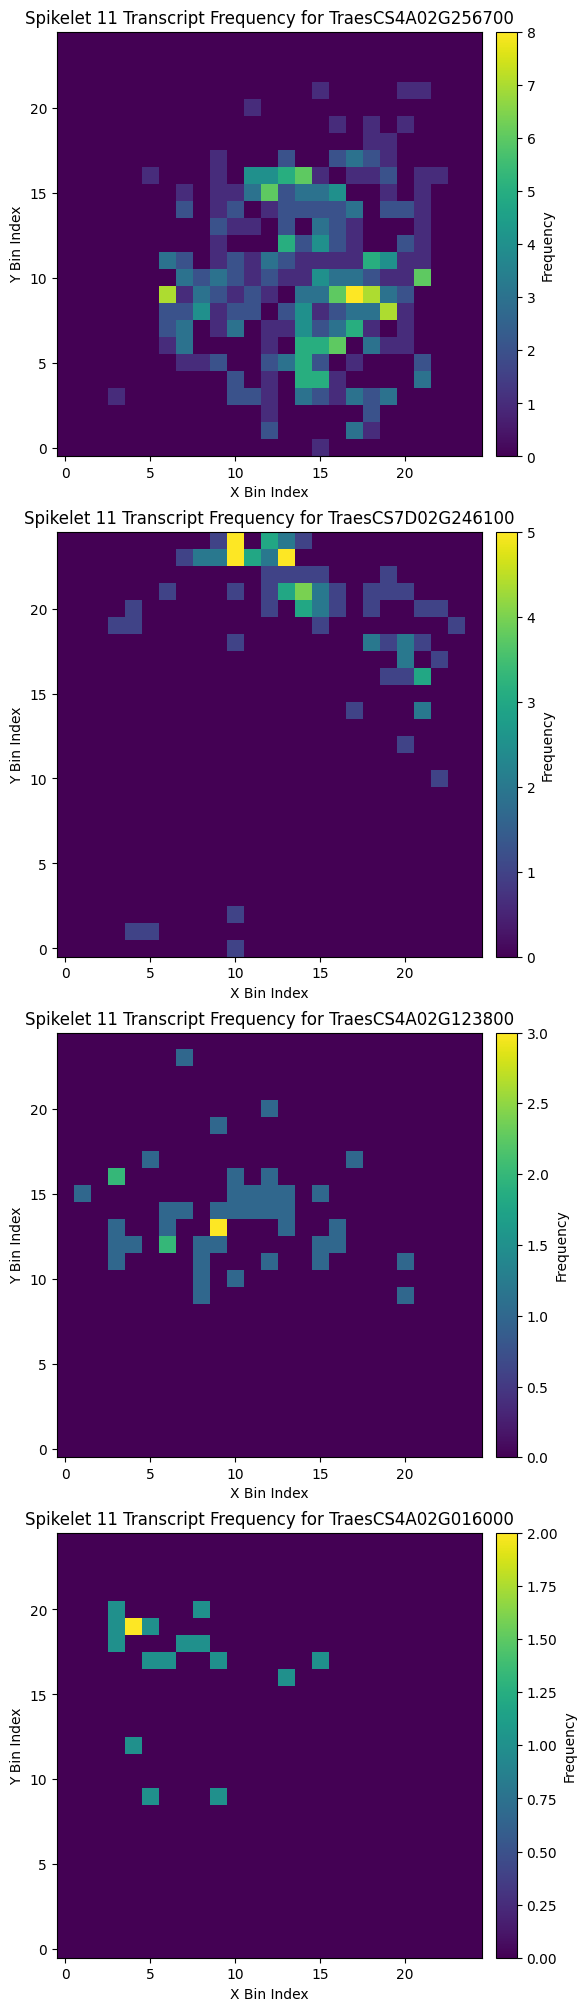

In [58]:
# Plot heatmaps for each gene
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 20), constrained_layout=True)

for ax, (gene, freq_matrix) in zip(axes, frequency_data.items()):
    im = ax.imshow(freq_matrix, cmap='viridis', origin='lower')
    ax.set_title(f"Spikelet 11 Transcript Frequency for {gene}", fontsize=12)
    ax.set_xlabel("X Bin Index")
    ax.set_ylabel("Y Bin Index")
    fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02).set_label("Frequency")
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_spikelet11_bin25_heatmaps.png', dpi=700, bbox_inches='tight', format='png')
plt.show()

In [59]:
frequency_data_spikelet11 = frequency_data.copy()

# combining all four grids to make a composite map 

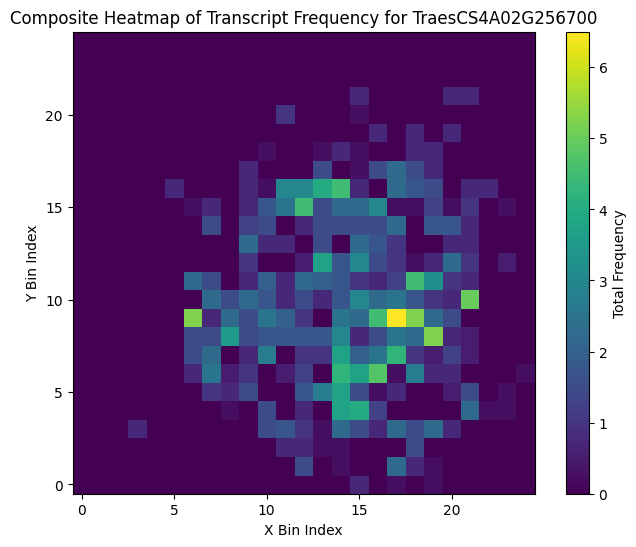

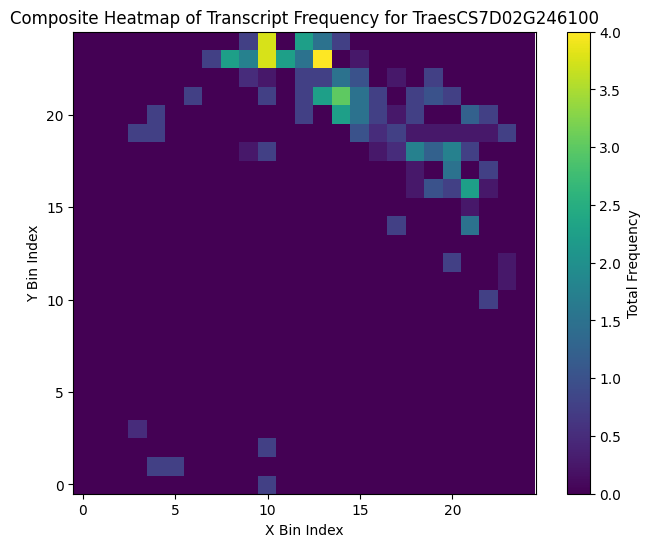

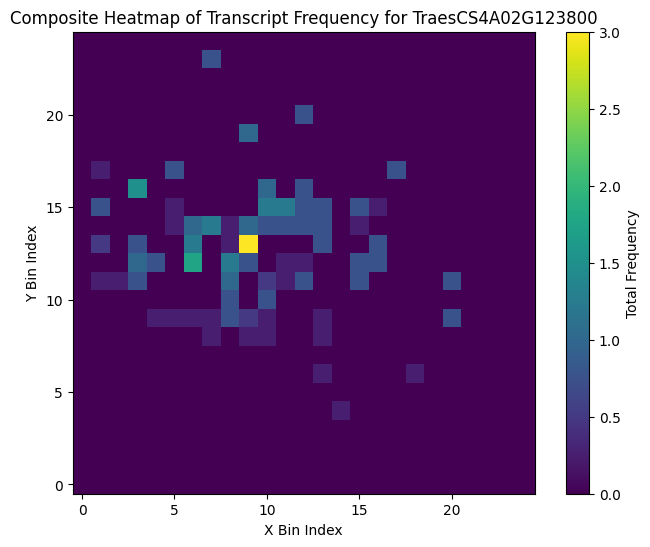

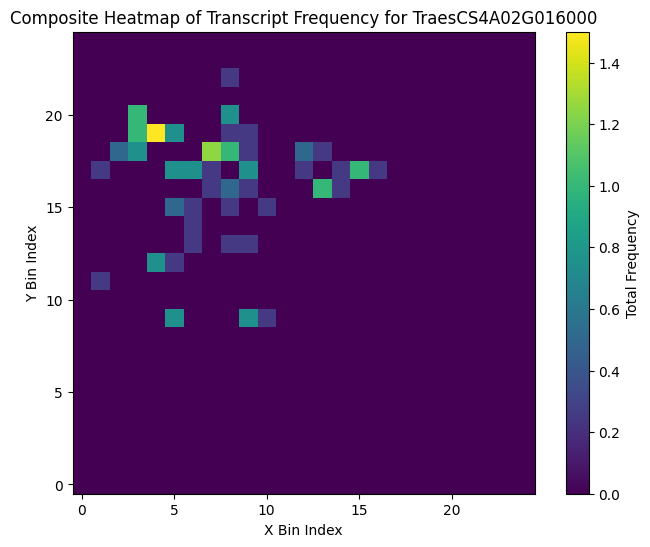

In [60]:
# Combine the frequency data by averaging or summing
combined_frequency_data = {}
for gene in genes_of_interest.keys():
    # Sum or average the frequencies from the two samples
    combined_frequency_data[gene] = (frequency_data_spikelet8[gene] + frequency_data_spikelet10[gene] + frequency_data_spikelet9[gene] + frequency_data_spikelet11[gene]) / 4  # Use .sum() instead of / 2 if summing

# Plot composite heatmap for each gene
for gene, freq_matrix in combined_frequency_data.items():
    plt.figure(figsize=(8, 6))
    plt.imshow(freq_matrix, cmap='viridis', origin='lower')
    
    # Label based on the combination method used
    colorbar_label = "Average Frequency" if "/ 2" in "combined_frequency_data" else "Total Frequency"
    plt.colorbar(label=colorbar_label)
    
    plt.title(f"Composite Heatmap of Transcript Frequency for {gene}")
    plt.xlabel("X Bin Index")
    plt.ylabel("Y Bin Index")
    plt.show()

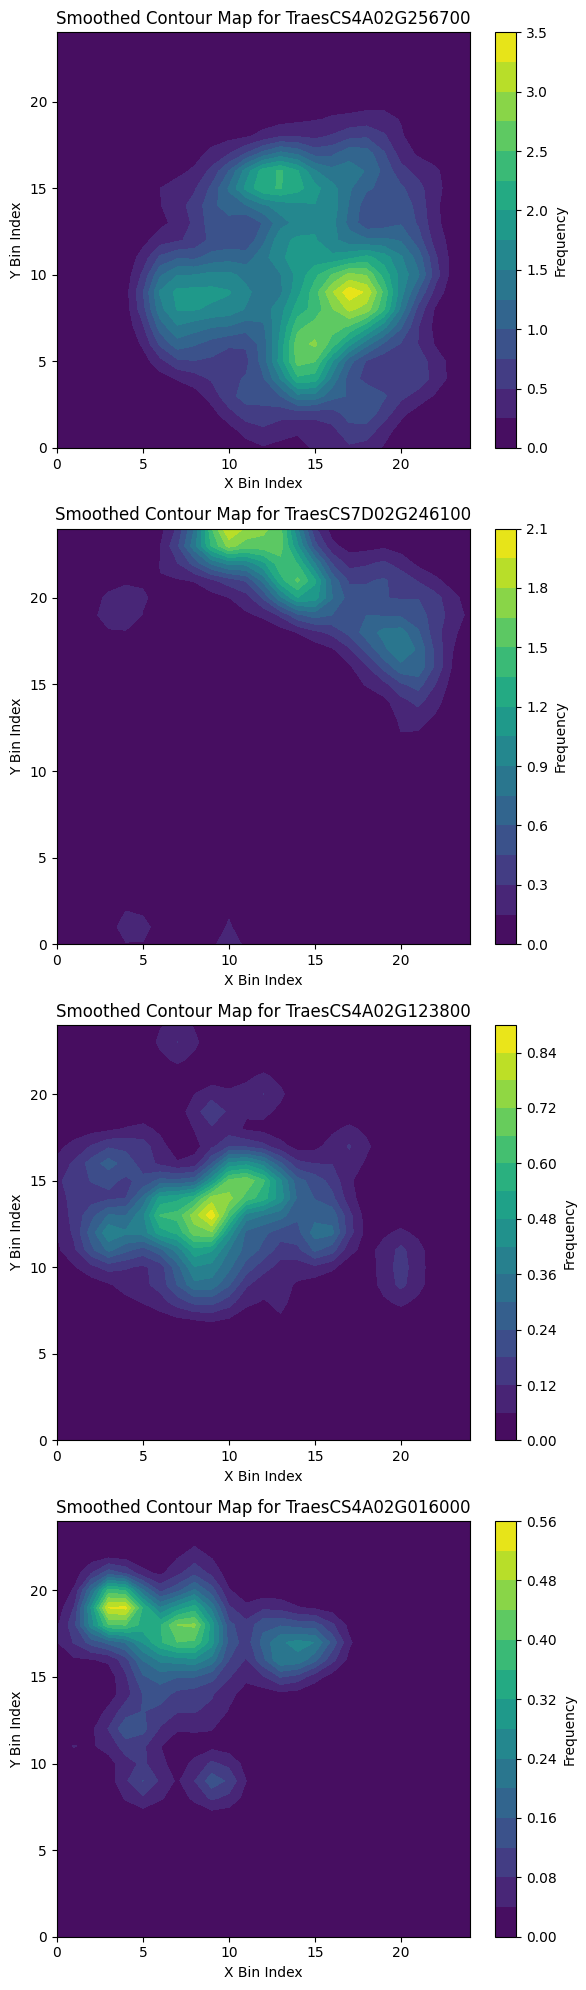

In [61]:
# Combine the frequency data by averaging or summing
combined_frequency_data = {}
for gene in genes_of_interest.keys():
    # Sum or average the frequencies from the two samples
    combined_frequency_data[gene] = (frequency_data_spikelet8[gene] + frequency_data_spikelet10[gene] + 
                                     frequency_data_spikelet9[gene] + frequency_data_spikelet11[gene]) / 4  # Average

# Create a single figure with 4 subplots (1 column, 4 rows)
fig, axs = plt.subplots(4, 1, figsize=(6, 20))  # Adjust `figsize` as needed for better visualization

for idx, (gene, freq_matrix) in enumerate(combined_frequency_data.items()):
    ax = axs[idx]  # Get the corresponding subplot

    # Replace NaN values with a small constant
    freq_matrix = np.nan_to_num(freq_matrix, nan=0.1)

    # Apply a Gaussian filter to smooth out the data before zooming
    smoothed_matrix = gaussian_filter(freq_matrix, sigma=1)  # Adjust sigma for desired smoothness

    # Apply smoothing by zooming in on the data
    zoom_factor = 1  # Adjust this to control the smoothing level
    smoothed_matrix = zoom(smoothed_matrix, zoom_factor)

    # Calculate the 20th percentile threshold
    threshold = np.percentile(smoothed_matrix, 20)

    # Apply threshold to set the bottom 20% to the threshold value
    smoothed_matrix = np.maximum(smoothed_matrix, threshold)

    # Create a dense grid for the smoothed data
    X, Y = np.meshgrid(
        np.linspace(0, freq_matrix.shape[1] - 1, smoothed_matrix.shape[1]),
        np.linspace(0, freq_matrix.shape[0] - 1, smoothed_matrix.shape[0])
    )

    # Create a contour plot with smoothed and thresholded data
    contour = ax.contourf(X, Y, smoothed_matrix, cmap='viridis', levels=15)  # Increase `levels` for more detail

    # Add colorbar to each subplot
    cbar = fig.colorbar(contour, ax=ax, orientation='vertical')
    cbar.set_label("Frequency")

    # Add title and labels to the subplot
    ax.set_title(f"Smoothed Contour Map for {gene}")
    ax.set_xlabel("X Bin Index")
    ax.set_ylabel("Y Bin Index")

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the final plot
plt.savefig('latedoubleridge_expressionanalysis/VGN1e1_compositemap_bin25_heatmaps.png', dpi=700, bbox_inches='tight', format='png')
plt.show()